In [ ]:
# import statements
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import (cross_val_score, cross_val_predict)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import geopandas as gpd

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Data and Preliminary Cleaning


In [ ]:
# Load education data
education_data = pd.read_csv('/content/drive/MyDrive/DS2500 Project/education_level.csv')

In [ ]:
# Drop rows containing information on educational attainment by race and educational
# attainment by income - we only want the educational attainment by age
# The unneeded rows are contained in rows 28-67.
education_data = education_data.drop([i for i in range (28,68)])

In [ ]:
# Drop first row (contains NaN data)
education_data = education_data.drop([0])

In [ ]:
education_data

Label (Grouping)  \
1                           Population 18 to 24 years   
2                      Less than high school graduate   
3           High school graduate (includes equival...   
4                  Some college or associate's degree   
5                         Bachelor's degree or higher   
6                        Population 25 years and over   
7                                 Less than 9th grade   
8                       9th to 12th grade, no diploma   
9           High school graduate (includes equival...   
10                            Some college, no degree   
11                                 Associate's degree   
12                                  Bachelor's degree   
13                    Graduate or professional degree   
14                     High school graduate or higher   
15                        Bachelor's degree or higher   
16                          Population 25 to 34 years   
17                     High school graduate or higher   
18                        Bachelor's degree or higher   
19                          Population 35 to 44 years   
20                     High school graduate or higher   
21                        Bachelor's degree or higher   
22                          Population 45 to 64 years   
23                     High school graduate or higher   
24                        Bachelor's degree or higher   
25                       Population 65 years and over   
26                     High school graduate or higher   
27                        Bachelor's degree or higher   

   Alabama!!Total!!Estimate Alabama!!Total!!Margin of Error  \
1                   457,530                          ±5,551   
2                    56,454                          ±4,838   
3                   158,761                          ±7,166   
4                   207,319                          ±7,341   
5                    34,996                          ±3,496   
6                 3,360,058                          ±5,792   
7                   130,320                          ±7,180   
8                   302,753                         ±10,699   
9                 1,039,241                         ±15,811   
10                  700,473                         ±14,036   
11                  301,914                          ±9,416   
12                  547,975                         ±14,065   
13                  337,382                         ±10,377   
14                2,926,985                         ±13,168   
15                  885,357                         ±18,293   
16                  637,403                          ±7,106   
17                  569,279                          ±7,448   
18                  174,995                          ±7,342   
19                  605,739                          ±5,786   
20                  532,109                          ±7,562   
21                  179,546                          ±7,738   
22                1,262,604                          ±6,025   
23                1,110,068                          ±8,368   
24                  332,863                          ±9,377   
25                  854,312                          ±4,129   
26                  715,529                          ±5,768   
27                  197,953                          ±6,851   

   Alabama!!Percent!!Estimate Alabama!!Percent!!Margin of Error  \
1                         (X)                               (X)   
2                       12.3%                              ±1.0   
3                       34.7%                              ±1.5   
4                       45.3%                              ±1.6   
5                        7.6%                              ±0.8   
6                         (X)                               (X)   
7                        3.9%                              ±0.2   
8                        9.0%                              ±0.3   
9                       30.9%                              ±0.5   
10   

In [ ]:
# Rename columns for conventional use
education_data.columns = education_data.columns.str.lower()
education_data.columns = education_data.columns.str.replace("!!", "_")
education_data.columns = education_data.columns.str.replace(" ", "_")

In [ ]:
# We only want to keep the percent estimate for population 25 years and older
# This data is contained in rows 7-13
percent_estimate_cols = []
for col in education_data.columns:
  if ("percent_estimate" in col) or ('label_(grouping)' in col):
    percent_estimate_cols.append(col)
education_data = education_data[percent_estimate_cols]
education_data = education_data.iloc[6:13]

In [ ]:
# Check to see all columns were renamed and only percent estimate columns remain
education_data

label_(grouping)  \
7                                 Less than 9th grade   
8                       9th to 12th grade, no diploma   
9           High school graduate (includes equival...   
10                            Some college, no degree   
11                                 Associate's degree   
12                                  Bachelor's degree   
13                    Graduate or professional degree   

   alabama_percent_estimate alaska_percent_estimate arizona_percent_estimate  \
7                      3.9%                    2.2%                     5.1%   
8                      9.0%                    4.3%                     7.3%   
9                     30.9%                   28.7%                    23.7%   
10                    20.8%                   25.7%                    25.0%   
11                     9.0%                    9.0%                     8.7%   
12                    16.3%                   18.5%                    18.8%   
13                    10.0%                   11.7%                    11.3%   

   arkansas_percent_estimate california_percent_estimate  \
7                       4.6%                        8.7%   
8                       7.9%                        7.3%   
9                      34.9%                       20.6%   
10                     21.8%                       20.6%   
11                      7.5%                        7.9%   
12                     15.1%                       21.9%   
13                      8.3%                       13.1%   

   colorado_percent_estimate connecticut_percent_estimate  \
7                       3.2%                         4.0%   
8                       4.4%                         5.3%   
9                      21.0%                        26.8%   
10                     20.3%                        16.5%   
11                      8.4%                         7.6%   
12                     26.6%                        22.0%   
13                     16.0%                        17.8%   

   delaware_percent_estimate district_of_columbia_percent_estimate  ...  \
7                       3.5%                                  3.3%  ...   
8                       6.2%                                  4.9%  ...   
9                      30.2%                                 15.8%  ...   
10                     18.6%                                 13.0%  ...   
11                      8.3%                                  3.3%  ...   
12                     19.5%                                 25.7%  ...   
13                     13.7%                                 34.0%  ...   

   tennessee_percent_estimate texas_percent_estimate utah_percent_estimate  \
7                        4.3%                   7.7%                  2.4%   
8                        7.7%                   7.7%                  4.5%   
9                       31.5%                  25.2%                 23.1%   
10                      20.3%                  21.2%                 25.5%   
11                       7.4%                   7.5%                  9.7%   
12                      18.0%                  20.0%                 23.4%   
13                      10.7%                  10.8%                 11.3%   

   vermont_percent_estimate virginia_percent_estimate  \
7                      2.1%                      3.8%   
8                      4.8%                      6.2%   
9                     29.0%                     23.6%   
10                    16.7%                     18.9%   
11                     8.7%                      8.0%   
12                    22.7%                     22.4%   
13                    16.0%                     17.2%   

   washington_percent_estimate west_virginia_percent_estimate  \
7                         3.5%                           4.2%   
8                         4.8%                           8.7%   
9                        22.1%                          40.2%   
10                       2

In [ ]:
# Read in crime data
crime_data = pd.read_csv('/content/drive/MyDrive/DS2500 Project/crimes_against_persons.csv')

In [ ]:
# Rename columns for conventional use
crime_data.columns = crime_data.columns.str.lower()
crime_data.columns = crime_data.columns.str.replace("\n"," ")
crime_data.columns = crime_data.columns.str.replace(' ', "_")
crime_data.columns = crime_data.columns.str.replace("__", "_")
crime_data.columns = crime_data.columns.str.replace('/', '')

In [ ]:
crime_data

state number_of_participating_agencies population_covered  \
0                  Total                           13,293        256,187,698   
1                Alabama                              404          4,519,862   
2                 Alaska                               32            444,412   
3                Arizona                               89          4,571,670   
4               Arkansas                              294          2,986,257   
5             California                              559         20,450,698   
6               Colorado                              234          5,825,547   
7            Connecticut                              107          3,626,205   
8               Delaware                               63          1,018,396   
9   District of Columbia                                2            671,803   
10               Florida                               73          7,025,392   
11               Georgia                              454          9,959,008   
12                Hawaii                                3          1,233,842   
13                 Idaho                              111          1,938,529   
14              Illinois                              520         10,010,597   
15               Indiana                              209          5,603,871   
16                  Iowa                              228          2,968,878   
17                Kansas                              327          2,675,833   
18              Kentucky                              431          4,509,571   
19             Louisiana                              148          3,428,406   
20                 Maine                              131          1,384,006   
21              Maryland                               95          4,898,180   
22         Massachusetts                              384          6,947,897   
23              Michigan                              603          9,616,858   
24             Minnesota                              408          5,711,489   
25           Mississippi                              152          1,791,767   
26              Missouri                              498          6,077,481   
27               Montana                              110          1,121,153   
28              Nebraska                              261          1,459,853   
29                Nevada                               55          3,162,409   
30         New Hampshire                              213          1,378,928   
31            New Jersey                              309          5,630,105   
32            New Mexico                               95          1,813,146   
33              New York                              149          4,587,827   
34        North Carolina                              407         10,235,931   
35          North Dakota                              111            779,261   
36                  Ohio                              637         10,916,774   
37              Oklahoma                              461          4,019,800   
38                Oregon                              212          4,079,739   
39          Pennsylvania                              132          5,229,066   
40          Rhode Island                               48          1,092,311   
41        South Carolina                              462          5,271,145   
42          South Dakota                              107            830,169   
43             Tennessee                              399          7,047,629   
44                 Texas                            1,063         29,643,845   
45                  Utah                              135          3,325,856   
46               Vermont                               86            647,064   
47              Virginia                              410          8,682,813   
48            Washington                              246          7,730,372   
49         West Vir

# Cleaning Data

In [ ]:
# Reset the index and rename the label columns
education_data.reset_index(drop = True, inplace = True)
education_data = education_data.rename(columns = {'label_(grouping)' : "Level"})

In [ ]:
# Ensure that both dataframes contain the same states/territories
crime_states = []
for state in list(crime_data['state'])[1:]:
  crime_states.append(state.upper())
education_states = []
for state in education_data.columns[1:]:
  cleaned_state = state.replace("_percent_estimate", "").replace("_", " ")
  education_states.append(cleaned_state.upper())
no_match_states = {}
for state in crime_states:
  if not state in education_states:
    no_match_states[f"Crime Data {state}"] = state
for state in education_states:
  if not state in crime_states:
    no_match_states[f"Education Data {state}"] = state

In [ ]:
no_match_states

{'Education Data PUERTO RICO': 'PUERTO RICO'}

In [ ]:
# The only state not contained in both dataframes is Puerto Rico - comes from education data
# We must drop the puerto rico column from the education dataframe
education_data = education_data.drop(columns = 'puerto_rico_percent_estimate')

In [ ]:
# Compare the shapes of the dataframes to ensure they have the same number of states
education_data.shape # Contains 51 states (columns) (excluding the label column)
crime_data.shape # Contains 51 states (rows) (excluding total row)

(52, 9)

In [ ]:
# In the education data, the states are contained in the rows, whereas in the crime dataframe, the states are in the columns
# Now we want to merge the dataframes so that each row (state) in the crime_data dataframe also has values showing the percent of
# people with each educational attainment
less_than_9th = list(education_data.iloc[0])[1:]
some_high_school = list(education_data.iloc[1])[1:]
high_school_grad = list(education_data.iloc[2])[1:]
some_college_no_deg = list(education_data.iloc[3])[1:]
assoc_deg = list(education_data.iloc[4])[1:]
bach_deg = list(education_data.iloc[5])[1:]
grad_or_prof = list(education_data.iloc[6])[1:]

In [ ]:
# Remove the total column from the crime data frame to facilitate merging
crime_data = crime_data.iloc[1:]
# Adding to crime data
crime_data["Less than 9th grade"] = less_than_9th
crime_data["Some high school"] = some_high_school
crime_data["High school graduate"] = high_school_grad
crime_data["Some college"] = some_college_no_deg
crime_data["Associate's degree"] = assoc_deg
crime_data["Bachelor's degree"] = bach_deg
crime_data["Graduate or professional degree"] = grad_or_prof

<ipython-input-20-fc2729f041c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data["Less than 9th grade"] = less_than_9th
<ipython-input-20-fc2729f041c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data["Some high school"] = some_high_school
<ipython-input-20-fc2729f041c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
# Convert every element to a float
def convert_to_flt(df_string):
  ''' Given a data frame columns, converts every element in that column
  to a float.
  '''
  cleaned_string = df_string.replace("%", "").replace(",", "")
  try:
    return float(cleaned_string)
  except ValueError:
    return cleaned_string

In [ ]:
# Apply the function to the crime_data dataframe to finalize the merged crime/education dataframe
crime_education_data = crime_data.applymap(lambda x: convert_to_flt(x))

In [ ]:
# Apply the convert_to_flt function to the original crime_data dataframe (needed for analysis of crime data)
crime_data = crime_data.applymap(lambda x: convert_to_flt(x))

In [ ]:
# Final, cleaned data frame
crime_education_data

state  number_of_participating_agencies  \
1                Alabama                             404.0   
2                 Alaska                              32.0   
3                Arizona                              89.0   
4               Arkansas                             294.0   
5             California                             559.0   
6               Colorado                             234.0   
7            Connecticut                             107.0   
8               Delaware                              63.0   
9   District of Columbia                               2.0   
10               Florida                              73.0   
11               Georgia                             454.0   
12                Hawaii                               3.0   
13                 Idaho                             111.0   
14              Illinois                             520.0   
15               Indiana                             209.0   
16                  Iowa                             228.0   
17                Kansas                             327.0   
18              Kentucky                             431.0   
19             Louisiana                             148.0   
20                 Maine                             131.0   
21              Maryland                              95.0   
22         Massachusetts                             384.0   
23              Michigan                             603.0   
24             Minnesota                             408.0   
25           Mississippi                             152.0   
26              Missouri                             498.0   
27               Montana                             110.0   
28              Nebraska                             261.0   
29                Nevada                              55.0   
30         New Hampshire                             213.0   
31            New Jersey                             309.0   
32            New Mexico                              95.0   
33              New York                             149.0   
34        North Carolina                             407.0   
35          North Dakota                             111.0   
36                  Ohio                             637.0   
37              Oklahoma                             461.0   
38                Oregon                             212.0   
39          Pennsylvania                             132.0   
40          Rhode Island                              48.0   
41        South Carolina                             462.0   
42          South Dakota                             107.0   
43             Tennessee                             399.0   
44                 Texas                            1063.0   
45                  Utah                             135.0   
46               Vermont                              86.0   
47              Virginia                             410.0   
48            Washington                             246.0   
49         West Virginia                             214.0   
50             Wisconsin                             362.0   
51               Wyoming                              50.0   

    population_covered  total_offenses  assault_offenses  homicide_offenses  \
1            4519862.0         76654.0           73898.0              482.0   
2             444412.0          6681.0            5826.0               45.0   
3            4571670.0         58118.0           53000.0              293.0   
4            2986257.0         64358.0           60242.0              337.0   
5           20450698.0        184079.0          165486.0              762.0   
6            5825547.0         72319.0           63021.0              448.0   
7            3626205.0         31418.0           29074.0              168.0   
8            1018396.0         16578.0           15790.0               71.0   
9             671803.0         21196.0           20235.0              197.0   
10  

# Creating a Classifying Algorithm

 According to education, substance abuse rates, and rates of mental illness, how can we predict if a particular region will have low, medium, or high rates of crime?



To identify crime rates as low, medium, or high, we are going to divide the percent of crime into thirds. Ordering the data ascendingly, we will determine
the terciles within the crime rates. Data from the lowest value to T1 will be
classified as "low". Data between T1 and T2 will be classified as "medium", and
data from T3 and up will be classified as "high".

In [ ]:
# First, we must express total criminal offenses as a percentage of the total
# population covered.
pop_covered = list(crime_education_data['population_covered'])
total_offenses = list(crime_education_data['total_offenses'])
crime_as_percent = [round(total_offenses[i] / pop_covered[i], 5) for i in range(len(total_offenses))]

In [ ]:
# Add the column to the data frame in between the population covered and the
# total number of offenses
crime_education_data.insert(3, "crime_as_percent", crime_as_percent)

In [ ]:
def calculate_terciles(data):
  ''' Given a list of numbers, calculates and returns the terciles in the data.
  66% of the data in the list is greater than the first tercile. 33% of the data
  is greater than the second tercile.
  '''
  sorted_data = sorted(data)
  n = len(sorted_data)
  tercile_1 = sorted_data[n // 3]
  tercile_2 = sorted_data[2 * (n // 3)]
  return tercile_1, tercile_2

In [ ]:
# Call the function on the crime as percent data.
tercile_1, tercile_2 = calculate_terciles(crime_as_percent)
tercile_1, tercile_2

(0.01124, 0.01503)

In [ ]:
# Now for assigning a label to each state based on its crime rate.
crime_classification = []
crime_class_value = []
for pct in list(crime_education_data['crime_as_percent']):
  if pct <= tercile_1:
    # Crime rates lower than or equal to the first tercile are considered
    # low and have a class value of 0.
    crime_classification.append('low')
    crime_class_value.append(0)
  elif (pct > tercile_1) & (pct <= tercile_2):
    # Crime rates between tercile 1 and 2 are considered medium and have a
    # class value of 1
    crime_classification.append('medium')
    crime_class_value.append(1)
  else:
    # Crime rates higher than tercile 2 are considered high and have a class
    # value of 2.
    crime_classification.append('high')
    crime_class_value.append(2)

In [ ]:
# Inserting the crime labels into the data frame at the front of the data frame
crime_education_data.insert(1, "crime_level", crime_classification)
crime_education_data.insert(2, 'class_value', crime_class_value)

In [ ]:
# Sanity check - labels and classes look good
crime_education_data

state crime_level  class_value  \
1                Alabama        high            2   
2                 Alaska      medium            1   
3                Arizona      medium            1   
4               Arkansas        high            2   
5             California         low            0   
6               Colorado      medium            1   
7            Connecticut         low            0   
8               Delaware        high            2   
9   District of Columbia        high            2   
10               Florida         low            0   
11               Georgia      medium            1   
12                Hawaii         low            0   
13                 Idaho         low            0   
14              Illinois        high            2   
15               Indiana      medium            1   
16                  Iowa         low            0   
17                Kansas        high            2   
18              Kentucky         low            0   
19             Louisiana        high            2   
20                 Maine         low            0   
21              Maryland      medium            1   
22         Massachusetts         low            0   
23              Michigan        high            2   
24             Minnesota         low            0   
25           Mississippi      medium            1   
26              Missouri      medium            1   
27               Montana      medium            1   
28              Nebraska      medium            1   
29                Nevada        high            2   
30         New Hampshire         low            0   
31            New Jersey         low            0   
32            New Mexico        high            2   
33              New York         low            0   
34        North Carolina      medium            1   
35          North Dakota        high            2   
36                  Ohio      medium            1   
37              Oklahoma        high            2   
38                Oregon         low            0   
39          Pennsylvania      medium            1   
40          Rhode Island         low            0   
41        South Carolina        high            2   
42          South Dakota        high            2   
43             Tennessee        high            2   
44                 Texas        high            2   
45                  Utah      medium            1   
46               Vermont         low            0   
47              Virginia      medium            1   
48            Washington      medium            1   
49         West Virginia         low            0   
50             Wisconsin         low            0   
51               Wyoming      medium            1   

    number_of_participating_agencies  population_covered  crime_as_percent  \
1                              404.0           4519862.0           0.01696   
2                               32.0            444412.0           0.01503   
3                               89.0           4571670.0           0.01271   
4                              294.0           2986257.0           0.02155   
5                              559.0          20450698.0           0.00900   
6                              234.0           5825547.0           0.01241   
7                              107.0           3626205.0           0.00866   
8                               63.0           1018396.0           0.01628   
9                                2.0            671803.0           0.03155   
10                              73.0           7025392.0           0.01054   
11                             454.0           9959008.0           0.01350   
12                               3.0           1233842.0           0.01124   
13                             111.0           1938529.0           0.00984   
14                             520.0          10010597.0           0.01635   
15                             209.0           5603871.0           0.01321   
16            

In [ ]:
# Reading in CDC Wonder Data - Unintentional Drug Overdose in Americans aged 25+ in 2021
overdose_data = pd.read_table("/content/drive/MyDrive/DS2500 Project/unintentional_overdose.txt", delimiter="\t")

In [ ]:
# We are only interested in the crude rate wich shows the number of deaths proportional to the population
overdose_data = overdose_data[['State', 'Crude Rate']]

In [ ]:
# Change the name of the State column so it is the same as crime_education_data
# and merge
overdose_data = overdose_data.rename(columns = {"State" : "state", "Crude Rate": "crude_rate_of_unintentional_drug_overdose"})
crime_education_data_classifier = crime_education_data.merge(overdose_data, on = 'state', how = 'inner')

In [ ]:
# Sanity Check
crime_education_data_classifier.head(5)

state crime_level  class_value  number_of_participating_agencies  \
0     Alabama        high            2                             404.0   
1      Alaska      medium            1                              32.0   
2     Arizona      medium            1                              89.0   
3    Arkansas        high            2                             294.0   
4  California         low            0                             559.0   

   population_covered  crime_as_percent  total_offenses  assault_offenses  \
0           4519862.0           0.01696         76654.0           73898.0   
1            444412.0           0.01503          6681.0            5826.0   
2           4571670.0           0.01271         58118.0           53000.0   
3           2986257.0           0.02155         64358.0           60242.0   
4          20450698.0           0.00900        184079.0          165486.0   

   homicide_offenses  human_trafficking_offenses  kidnapping_abduction  \
0              482.0                        36.0                 338.0   
1               45.0                         9.0                  41.0   
2              293.0                        82.0                 794.0   
3              337.0                        10.0                 652.0   
4              762.0                       127.0                4847.0   

   sex_offenses  Less than 9th grade  Some high school  High school graduate  \
0        1900.0                  3.9               9.0                  30.9   
1         760.0                  2.2               4.3                  28.7   
2        3949.0                  5.1               7.3                  23.7   
3        3117.0                  4.6               7.9                  34.9   
4       12857.0                  8.7               7.3                  20.6   

   Some college  Associate's degree  Bachelor's degree  \
0          20.8                 9.0               16.3   
1          25.7                 9.0               18.5   
2          25.0                 8.7               18.8   
3          21.8                 7.5               15.1   
4          20.6                 7.9               21.9   

   Graduate or professional degree  crude_rate_of_unintentional_drug_overdose  
0                             10.0                                     35.826  
1                             11.7                                     45.640  
2                             11.3                                     44.626  
3                              8.3                                     25.678  
4                             13.1                                     35.108

In [ ]:
# Scraping Mental Health Data
url = 'https://mhanational.org/issues/2022/mental-health-america-adult-data'
page = requests.get(url)
soup = BeautifulSoup(page.text)

In [ ]:
# Finding all the states and overall mental illness rates
states = soup.find_all('td', headers="view-field-state-table-column--2", class_="views-field views-field-field-state")
rates = soup.find_all('td', headers="view-field-percentage-table-column", class_="views-field views-field-field-percentage")
# Reformatting the state names and converting the percentages to float
state_rates = {}
for i in range(len(states)):
  state_rates[states[i].text.replace('          ', "")] = float(rates[i].text.replace('          ', ""))
state_rates

{'New Jersey': 16.37,
 'Texas': 17.17,
 'Florida': 17.23,
 'Hawaii': 17.45,
 'Maryland': 17.57,
 'Georgia': 17.88,
 'South Dakota': 18.26,
 'Iowa': 18.5,
 'Virginia': 18.58,
 'Connecticut': 18.85,
 'Illinois': 19.18,
 'North Carolina': 19.31,
 'Tennessee': 19.4,
 'South Carolina': 19.43,
 'California': 19.49,
 'New York': 19.52,
 'Pennsylvania': 19.7,
 'Arizona': 20.06,
 'Mississippi': 20.16,
 'Wisconsin': 20.19,
 'Nebraska': 20.3,
 'Michigan': 20.32,
 'Arkansas': 20.34,
 'North Dakota': 20.5,
 'Minnesota': 20.53,
 'Kansas': 20.56,
 'Montana': 20.81,
 'Delaware': 20.92,
 'Massachusetts': 21.15,
 'Louisiana': 21.21,
 'Alabama': 21.29,
 'New Mexico': 21.39,
 'Alaska': 21.47,
 'Nevada': 21.97,
 'Maine': 22.1,
 'Vermont': 22.25,
 'Indiana': 22.29,
 'New Hampshire': 22.37,
 'Rhode Island': 22.38,
 'Idaho': 22.48,
 'Oklahoma': 22.54,
 'Kentucky': 22.54,
 'Wyoming': 22.56,
 'Missouri': 22.71,
 'District of Columbia': 22.83,
 'Colorado': 23.2,
 'Washington': 23.43,
 'Ohio': 23.64,
 'Oregon': 2

In [ ]:
# Sorting the dictionary by state so the states are in the same order as the data frame
sorted_state_rates = dict(sorted(state_rates.items(), key = lambda item: item[0]))
sorted_state_rates

{'Alabama': 21.29,
 'Alaska': 21.47,
 'Arizona': 20.06,
 'Arkansas': 20.34,
 'California': 19.49,
 'Colorado': 23.2,
 'Connecticut': 18.85,
 'Delaware': 20.92,
 'District of Columbia': 22.83,
 'Florida': 17.23,
 'Georgia': 17.88,
 'Hawaii': 17.45,
 'Idaho': 22.48,
 'Illinois': 19.18,
 'Indiana': 22.29,
 'Iowa': 18.5,
 'Kansas': 20.56,
 'Kentucky': 22.54,
 'Louisiana': 21.21,
 'Maine': 22.1,
 'Maryland': 17.57,
 'Massachusetts': 21.15,
 'Michigan': 20.32,
 'Minnesota': 20.53,
 'Mississippi': 20.16,
 'Missouri': 22.71,
 'Montana': 20.81,
 'National': 19.86,
 'Nebraska': 20.3,
 'Nevada': 21.97,
 'New Hampshire': 22.37,
 'New Jersey': 16.37,
 'New Mexico': 21.39,
 'New York': 19.52,
 'North Carolina': 19.31,
 'North Dakota': 20.5,
 'Ohio': 23.64,
 'Oklahoma': 22.54,
 'Oregon': 23.75,
 'Pennsylvania': 19.7,
 'Rhode Island': 22.38,
 'South Carolina': 19.43,
 'South Dakota': 18.26,
 'Tennessee': 19.4,
 'Texas': 17.17,
 'Utah': 26.86,
 'Vermont': 22.25,
 'Virginia': 18.58,
 'Washington': 23.43

In [ ]:
# Remove the national value so the keys line up with the dictioniaries
remove_nat = sorted_state_rates.pop('National')

In [ ]:
# Create a data frame with the mental health data to facilitate merging
mental_health_df = pd.DataFrame({'state' : list(sorted_state_rates.keys()),
                                'Adult Prevalence of Mental Illness (%)' : list(sorted_state_rates.values())})
mental_health_df

state  Adult Prevalence of Mental Illness (%)
0                Alabama                                   21.29
1                 Alaska                                   21.47
2                Arizona                                   20.06
3               Arkansas                                   20.34
4             California                                   19.49
5               Colorado                                   23.20
6            Connecticut                                   18.85
7               Delaware                                   20.92
8   District of Columbia                                   22.83
9                Florida                                   17.23
10               Georgia                                   17.88
11                Hawaii                                   17.45
12                 Idaho                                   22.48
13              Illinois                                   19.18
14               Indiana                                   22.29
15                  Iowa                                   18.50
16                Kansas                                   20.56
17              Kentucky                                   22.54
18             Louisiana                                   21.21
19                 Maine                                   22.10
20              Maryland                                   17.57
21         Massachusetts                                   21.15
22              Michigan                                   20.32
23             Minnesota                                   20.53
24           Mississippi                                   20.16
25              Missouri                                   22.71
26               Montana                                   20.81
27              Nebraska                                   20.30
28                Nevada                                   21.97
29         New Hampshire                                   22.37
30            New Jersey                                   16.37
31            New Mexico                                   21.39
32              New York                                   19.52
33        North Carolina                                   19.31
34          North Dakota                                   20.50
35                  Ohio                                   23.64
36              Oklahoma                                   22.54
37                Oregon                                   23.75
38          Pennsylvania                                   19.70
39          Rhode Island                                   22.38
40        South Carolina                                   19.43
41          South Dakota                                   18.26
42             Tennessee                                   19.40
43                 Texas                                   17.17
44                  Utah                                   26.86
45               Vermont                                   22.25
46              Virginia                                   18.58
47            Washington                                   23.43
48         West Virginia                                   24.62
49             Wisconsin                                   20.19
50               Wyoming                                   22.56

In [ ]:
# Merge the mental health data onto the larger data frame containing the rest of the data
crime_education_data_classifier = crime_education_data_classifier.merge(mental_health_df, on = 'state')

In [ ]:
# Sanity check
crime_education_data_classifier.head(5)

state crime_level  class_value  number_of_participating_agencies  \
0     Alabama        high            2                             404.0   
1      Alaska      medium            1                              32.0   
2     Arizona      medium            1                              89.0   
3    Arkansas        high            2                             294.0   
4  California         low            0                             559.0   

   population_covered  crime_as_percent  total_offenses  assault_offenses  \
0           4519862.0           0.01696         76654.0           73898.0   
1            444412.0           0.01503          6681.0            5826.0   
2           4571670.0           0.01271         58118.0           53000.0   
3           2986257.0           0.02155         64358.0           60242.0   
4          20450698.0           0.00900        184079.0          165486.0   

   homicide_offenses  human_trafficking_offenses  ...  sex_offenses  \
0              482.0                        36.0  ...        1900.0   
1               45.0                         9.0  ...         760.0   
2              293.0                        82.0  ...        3949.0   
3              337.0                        10.0  ...        3117.0   
4              762.0                       127.0  ...       12857.0   

   Less than 9th grade  Some high school  High school graduate  Some college  \
0                  3.9               9.0                  30.9          20.8   
1                  2.2               4.3                  28.7          25.7   
2                  5.1               7.3                  23.7          25.0   
3                  4.6               7.9                  34.9          21.8   
4                  8.7               7.3                  20.6          20.6   

   Associate's degree  Bachelor's degree  Graduate or professional degree  \
0                 9.0               16.3                             10.0   
1                 9.0               18.5                             11.7   
2                 8.7               18.8                             11.3   
3                 7.5               15.1                              8.3   
4                 7.9               21.9                             13.1   

   crude_rate_of_unintentional_drug_overdose  \
0                                     35.826   
1                                     45.640   
2                                     44.626   
3                                     25.678   
4                                     35.108   

   Adult Prevalence of Mental Illness (%)  
0                                   21.29  
1                                   21.47  
2                                   20.06  
3                                   20.34  
4                                   19.49  

[5 rows x 21 columns]

In [ ]:
# Last step before we create the classifier - drop all the unneeded columns. We are only interested in the total number of offenses for this classifier,
# so we are dropping the other offense columns
crime_education_data_classifier = crime_education_data_classifier.drop(columns = ['number_of_participating_agencies', 'population_covered', 'total_offenses',
                                                              'assault_offenses', 'homicide_offenses', 'human_trafficking_offenses',
                                                              'kidnapping_abduction', 'sex_offenses'])

In [ ]:
# Since our other percent values are actual percent values, we are going to multiply the crime_as_percent colum by 100.
for i in range(len(crime_education_data_classifier['crime_as_percent'])):
  crime_education_data_classifier['crime_as_percent'].iloc[i] = crime_education_data_classifier['crime_as_percent'].iloc[i] * 100

<ipython-input-44-f28f431c77d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_education_data_classifier['crime_as_percent'].iloc[i] = crime_education_data_classifier['crime_as_percent'].iloc[i] * 100


In [ ]:
# Final Sanity Check
crime_education_data_classifier

state crime_level  class_value  crime_as_percent  \
0                Alabama        high            2             1.696   
1                 Alaska      medium            1             1.503   
2                Arizona      medium            1             1.271   
3               Arkansas        high            2             2.155   
4             California         low            0             0.900   
5               Colorado      medium            1             1.241   
6            Connecticut         low            0             0.866   
7               Delaware        high            2             1.628   
8   District of Columbia        high            2             3.155   
9                Florida         low            0             1.054   
10               Georgia      medium            1             1.350   
11                Hawaii         low            0             1.124   
12                 Idaho         low            0             0.984   
13              Illinois        high            2             1.635   
14               Indiana      medium            1             1.321   
15                  Iowa         low            0             0.982   
16                Kansas        high            2             1.708   
17              Kentucky         low            0             0.989   
18             Louisiana        high            2             1.776   
19                 Maine         low            0             0.943   
20              Maryland      medium            1             1.222   
21         Massachusetts         low            0             1.078   
22              Michigan        high            2             1.711   
23             Minnesota         low            0             0.869   
24           Mississippi      medium            1             1.309   
25              Missouri      medium            1             1.424   
26               Montana      medium            1             1.380   
27              Nebraska      medium            1             1.209   
28                Nevada        high            2             2.108   
29         New Hampshire         low            0             1.120   
30            New Jersey         low            0             0.777   
31            New Mexico        high            2             2.199   
32              New York         low            0             1.092   
33        North Carolina      medium            1             1.460   
34          North Dakota        high            2             1.593   
35                  Ohio      medium            1             1.498   
36              Oklahoma        high            2             1.646   
37                Oregon         low            0             1.022   
38          Pennsylvania      medium            1             1.297   
39          Rhode Island         low            0             0.855   
40        South Carolina        high            2             1.828   
41          South Dakota        high            2             1.664   
42             Tennessee        high            2             2.032   
43                 Texas        high            2             1.577   
44                  Utah      medium            1             1.188   
45               Vermont         low            0             0.653   
46              Virginia      medium            1             1.261   
47            Washington      medium            1             1.161   
48         West Virginia         low            0             0.896   
49             Wisconsin         low            0             0.897   
50               Wyoming      medium            1             1.345   

    Less than 9th grade  Some high school  High school graduate  Some college  \
0                   3.9               9.0                  30.9          20.8   
1                   2.2               4.3                  28.7          25.7   
2                   5.1               7.3                  23.7          25.0   
3 

In [ ]:
# For the classifier to work best, we want to normalize all of the column values.
def normalize(lst):
    ''' Given a list, return the min/max normalized version of the list
    '''
    scaled = []
    lst_min = min(lst)
    lst_max = max(lst)
    for num in lst:
        scale_num = (num - lst_min) / (lst_max - lst_min)
        scaled.append(scale_num)
    return scaled

In [ ]:
# Create a copy of the dataframe so the original dataframe is not changed
crime_education_data_normalized = crime_education_data_classifier.copy()
# Normalize all the values except the state name, class name, class value, and crime_as_percent.
for (column_name, column_data) in crime_education_data_normalized.iloc[:, 4:].items():
    crime_education_data_normalized[column_name] = normalize(column_data)

In [ ]:
crime_education_data_normalized

state crime_level  class_value  crime_as_percent  \
0                Alabama        high            2             1.696   
1                 Alaska      medium            1             1.503   
2                Arizona      medium            1             1.271   
3               Arkansas        high            2             2.155   
4             California         low            0             0.900   
5               Colorado      medium            1             1.241   
6            Connecticut         low            0             0.866   
7               Delaware        high            2             1.628   
8   District of Columbia        high            2             3.155   
9                Florida         low            0             1.054   
10               Georgia      medium            1             1.350   
11                Hawaii         low            0             1.124   
12                 Idaho         low            0             0.984   
13              Illinois        high            2             1.635   
14               Indiana      medium            1             1.321   
15                  Iowa         low            0             0.982   
16                Kansas        high            2             1.708   
17              Kentucky         low            0             0.989   
18             Louisiana        high            2             1.776   
19                 Maine         low            0             0.943   
20              Maryland      medium            1             1.222   
21         Massachusetts         low            0             1.078   
22              Michigan        high            2             1.711   
23             Minnesota         low            0             0.869   
24           Mississippi      medium            1             1.309   
25              Missouri      medium            1             1.424   
26               Montana      medium            1             1.380   
27              Nebraska      medium            1             1.209   
28                Nevada        high            2             2.108   
29         New Hampshire         low            0             1.120   
30            New Jersey         low            0             0.777   
31            New Mexico        high            2             2.199   
32              New York         low            0             1.092   
33        North Carolina      medium            1             1.460   
34          North Dakota        high            2             1.593   
35                  Ohio      medium            1             1.498   
36              Oklahoma        high            2             1.646   
37                Oregon         low            0             1.022   
38          Pennsylvania      medium            1             1.297   
39          Rhode Island         low            0             0.855   
40        South Carolina        high            2             1.828   
41          South Dakota        high            2             1.664   
42             Tennessee        high            2             2.032   
43                 Texas        high            2             1.577   
44                  Utah      medium            1             1.188   
45               Vermont         low            0             0.653   
46              Virginia      medium            1             1.261   
47            Washington      medium            1             1.161   
48         West Virginia         low            0             0.896   
49             Wisconsin         low            0             0.897   
50               Wyoming      medium            1             1.345   

    Less than 9th grade  Some high school  High school graduate  Some college  \
0              0.323944          0.828125              0.618852      0.600000   
1              0.084507          0.093750              0.528689      0.976923   
2              0.492958          0.562500              0.323770      0.923077   
3 

In [ ]:
# The classifying model will be a K-Nearest Neighbors Classifier
# First, we must determine the ideal value of K. We will choose a value between
# 4 and 18.
# We want to select our value of k based on accuracy, so we will record the mean
# accuracy score for each k and choose the highest.
ks = [i for i in range(4, 19)]

In [ ]:
# Splitting the data
y = crime_education_data_normalized['class_value']
X = crime_education_data_normalized.iloc[:, 4:]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
mean_accuracies = {}
for k in ks:
    # Create a KFold for this value of k
    kf = KFold(n_splits = 4, shuffle = True, random_state = 0)
    knn = KNeighborsClassifier(n_neighbors = k)

    # For the following score, the cross-validation parameter (cv) is equal to the kfold
    # Find accuracy score
    cv_score_accuracy = cross_val_score(knn, X, y, cv = kf, scoring = 'accuracy')
    mean_accuracies[k] = np.mean(cv_score_accuracy)

In [ ]:
# Finding highest accuracy
max(mean_accuracies.items(), key = lambda item: item[1])

(10, 0.4375)

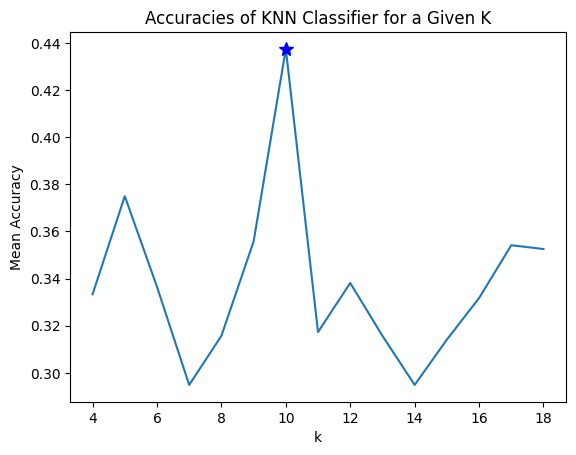

In [ ]:
# Plot the mean accuracies to confirm
plt.plot(ks, list(mean_accuracies.values()))
plt.plot(10, list(mean_accuracies.values())[6], marker = '*', ms = 10, color = 'blue')
plt.title("Accuracies of KNN Classifier for a Given K")
plt.xlabel("k")
plt.ylabel("Mean Accuracy")
plt.show()

In [ ]:
# The maximum accuracy occurs when k = 10
# Create a classifier with k = 10
knn = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
# Fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Predicting the test values
y_pred = knn.predict(X_test)

In [ ]:
# Developing a classification report for the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.00      0.00      0.00         5
           2       0.33      0.67      0.44         3

    accuracy                           0.46        13
   macro avg       0.30      0.49      0.37        13
weighted avg       0.30      0.46      0.36        13



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Find the final accuracy score of the classifier
accuracy_score(y_test, y_pred)

0.46153846153846156

# Plotting Education, Crime, Substance Abuse, and Mental Illness Data


In [ ]:
# Reading in the United States shp file
state_map = gpd.read_file('/content/drive/MyDrive/DS2500 Project/usa-states-census-2014.shp')

In [ ]:
# Merge classifier data (crime, education, substance abuse, mental illness) with the shp file
plotting = state_map.merge(crime_education_data_classifier, left_on = "NAME", right_on = 'state')
plotting.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0      06  01779778  0400000US06    06     CA            California   00   
1      11  01702382  0400000US11    11     DC  District of Columbia   00   
2      12  00294478  0400000US12    12     FL               Florida   00   
3      13  01705317  0400000US13    13     GA               Georgia   00   
4      16  01779783  0400000US16    16     ID                 Idaho   00   

          ALAND       AWATER     region  ... crime_as_percent  \
0  403483823181  20483271881       West  ...            0.900   
1     158350578     18633500  Northeast  ...            3.155   
2  138903200855  31407883551  Southeast  ...            1.054   
3  148963503399   4947080103  Southeast  ...            1.350   
4  214045425549   2397728105       West  ...            0.984   

  Less than 9th grade Some high school  High school graduate  Some college  \
0                 8.7              7.3                  20.6          20.6   
1                 3.3              4.9                  15.8          13.0   
2                 4.6              7.0                  28.4          19.4   
3                 4.5              7.6                  27.4          20.0   
4                 3.0              5.5                  26.1          26.0   

   Associate's degree  Bachelor's degree  Graduate or professional degree  \
0                 7.9               21.9                             13.1   
1                 3.3               25.7                             34.0   
2                 9.9               19.3                             11.4   
3                 8.0               19.9                             12.6   
4                10.6               18.8                              9.9   

   crude_rate_of_unintentional_drug_overdose  \
0                                     35.108   
1                                     86.482   
2                                     44.709   
3                                     29.730   
4                                     21.696   

   Adult Prevalence of Mental Illness (%)  
0                                   19.49  
1                                   22.83  
2                                   17.23  
3                                   17.88  
4                                   22.48  

[5 rows x 24 columns]

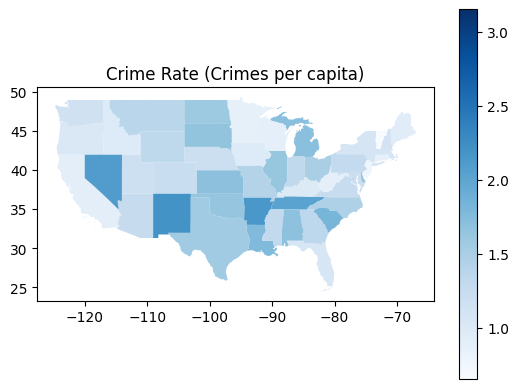

In [ ]:
# Plotting rate of total offenses
plotting.plot(cmap = 'Blues', column = "crime_as_percent", legend = True)
plt.title("Crime Rate (Crimes per capita)")
plt.show()

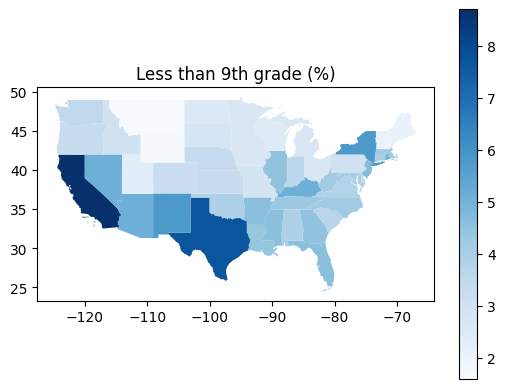

In [ ]:
# Plotting the percentage of people in each state who have acheived less than 9th grade
plotting.plot(cmap = 'Blues', column = "Less than 9th grade", legend = True)
plt.title("Less than 9th grade (%)")
plt.show()

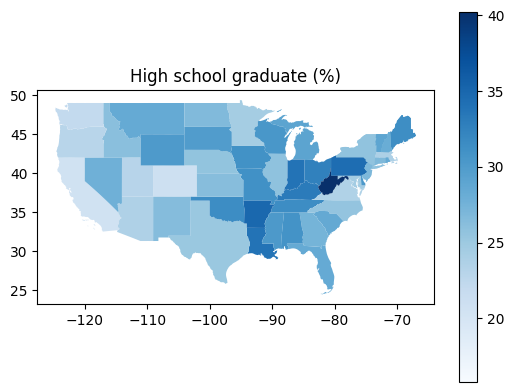

In [ ]:
# Plot the percent of people in each state who have a high school diploma
plotting.plot(cmap = 'Blues', column = "High school graduate", legend = True)
plt.title("High school graduate (%)")
plt.show()

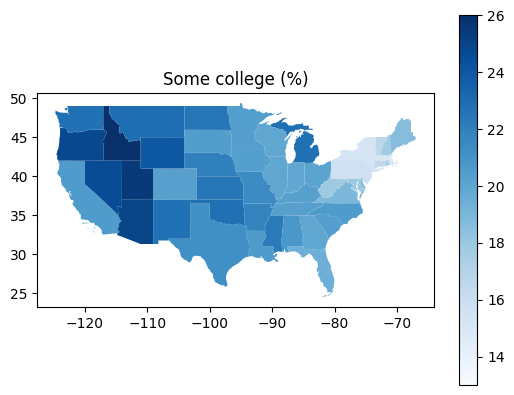

In [ ]:
# Plot the percent of people who have attained some college
plotting.plot(cmap = 'Blues', column = 'Some college', legend = True)
plt.title("Some college (%)")
plt.show()

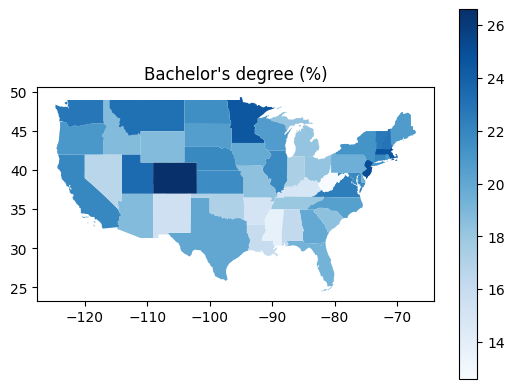

In [ ]:
# Plot the percent of people in each state who have a bachelor's degree
plotting.plot(cmap = 'Blues', column = "Bachelor's degree", legend = True)
plt.title("Bachelor's degree (%)")
plt.show()

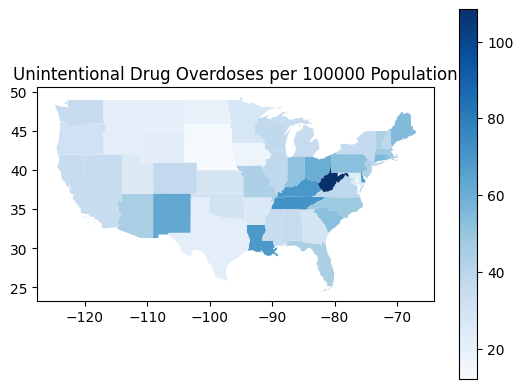

In [ ]:
# Plot the crude rate of unintentional drug overdose
plotting.plot(cmap = 'Blues', column = 'crude_rate_of_unintentional_drug_overdose', legend = True)
plt.title("Unintentional Drug Overdoses per 100000 Population")
plt.show()

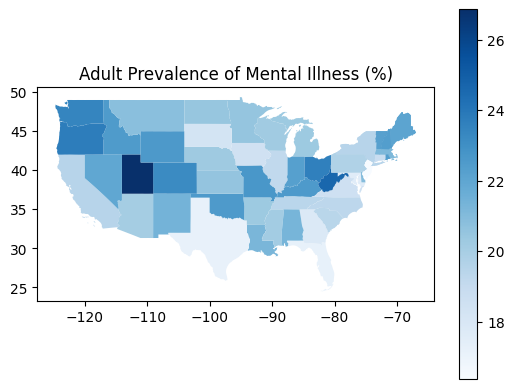

In [ ]:
# Plot the prevalence of mental illness in adults
plotting.plot(cmap = 'Blues', column = 'Adult Prevalence of Mental Illness (%)', legend = True)
plt.title("Adult Prevalence of Mental Illness (%)")
plt.show()

# Analysis of Education Data


In [ ]:
# Transpose the data
education_data_transposed = education_data.set_index('Level').transpose()
education_data_transposed.index = education_data_transposed.index.str.replace('_percent_estimate', '')

# Convert percentage data to numerical format
for col in education_data_transposed.columns:
    education_data_transposed[col] = education_data_transposed[col].str.rstrip('%').astype('float')

education_data_transposed.index = education_data_transposed.index.str.replace('_percent_estimate', '')

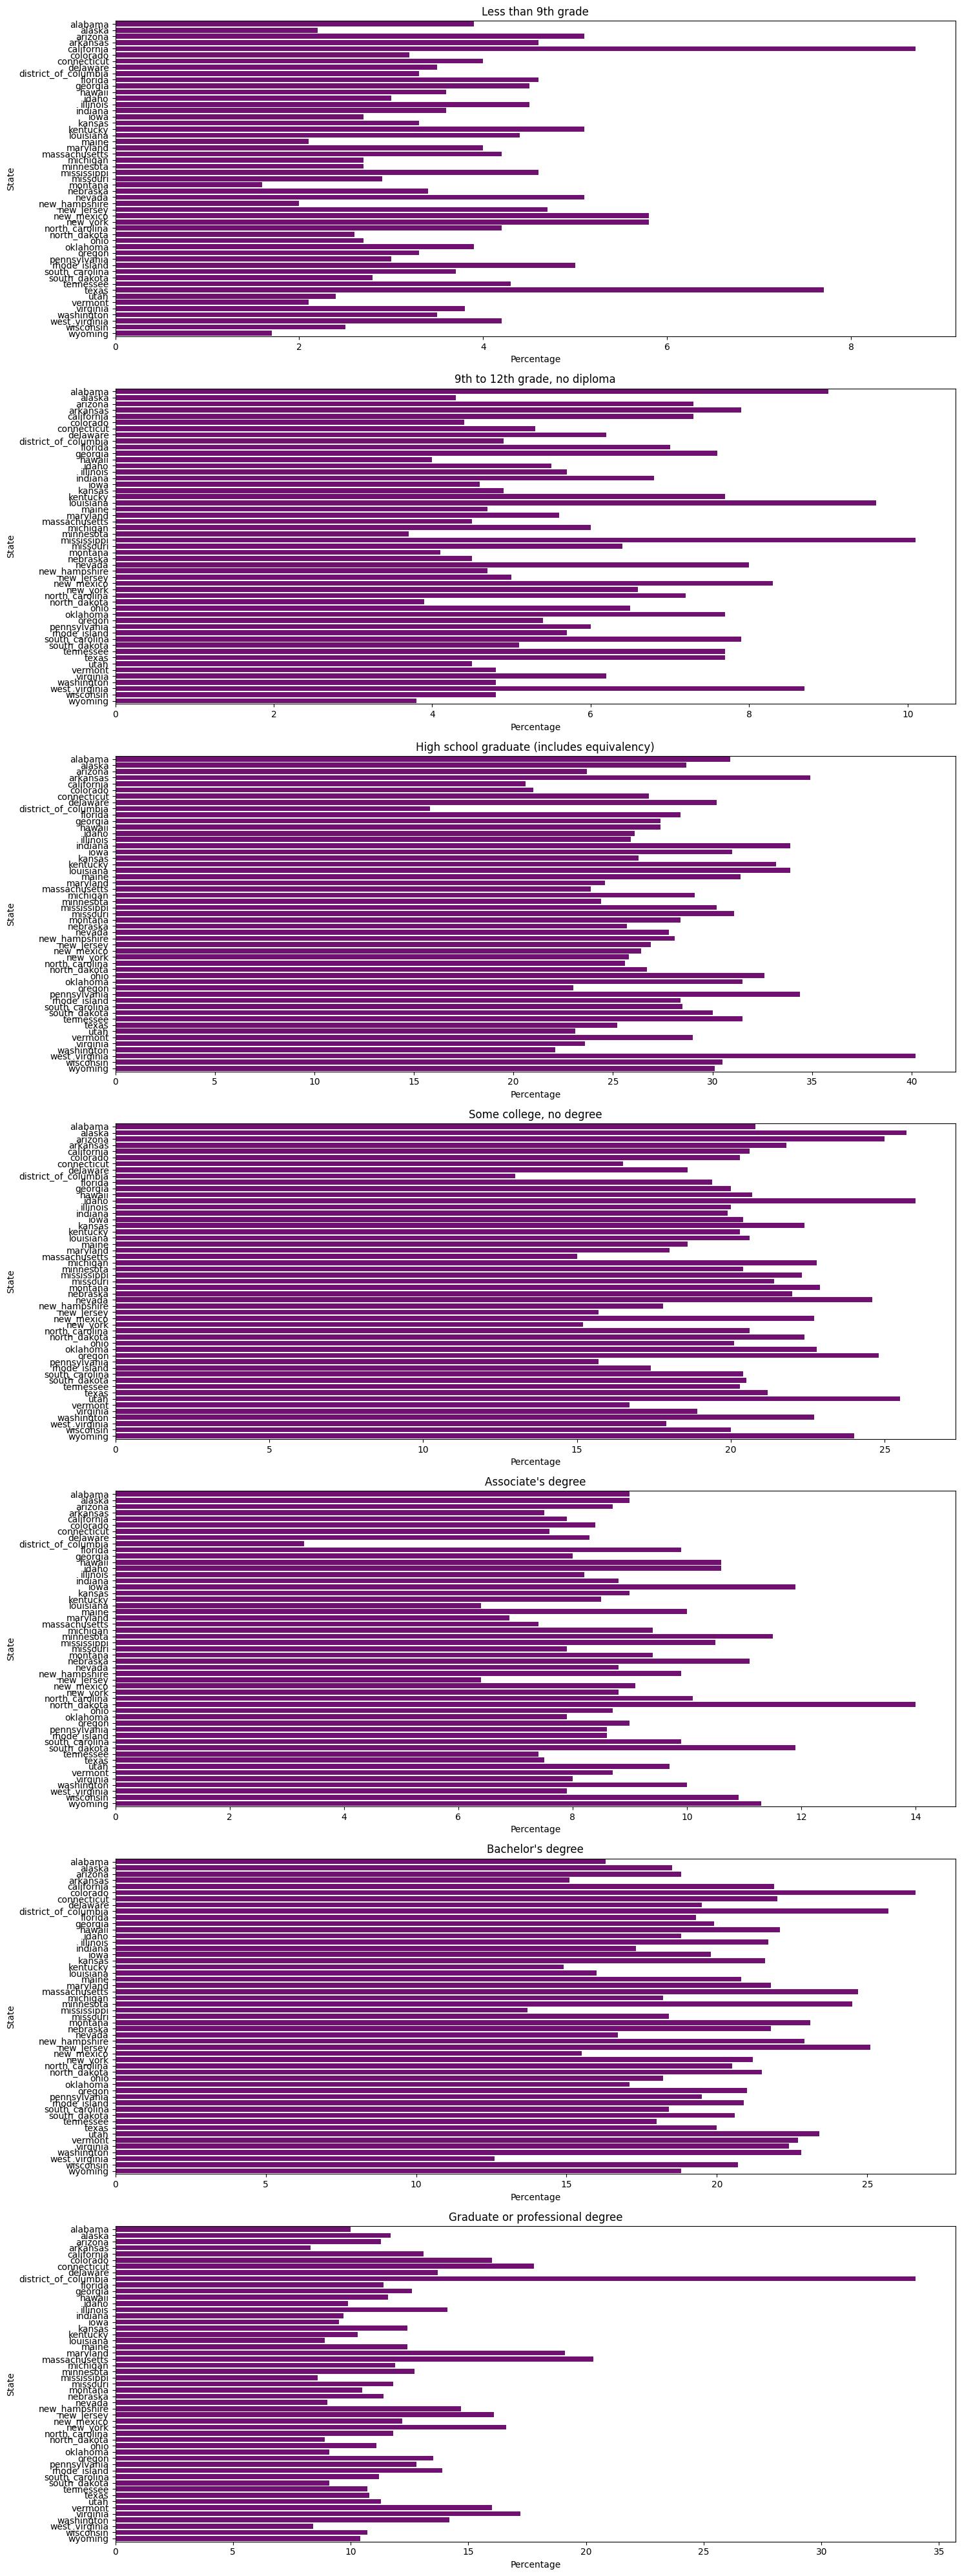

In [ ]:
# Creating histograms for each education level in the dataset
# Setting up the plot area - creating subplots for each education level
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15, 40))

# Looping through each education level to create a separate histogram
for i, col in enumerate(education_data_transposed.columns):
    sns.barplot(x=education_data_transposed[col], y=education_data_transposed.index, color='purple', ax=axes[i])
    axes[i].set_title(col.strip())
    axes[i].set_xlabel('Percentage')
    axes[i].set_ylabel('State')

plt.tight_layout()
plt.show()

In [ ]:
# Determining the optimal number of clusters using the Elbow Method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(education_data_transposed)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

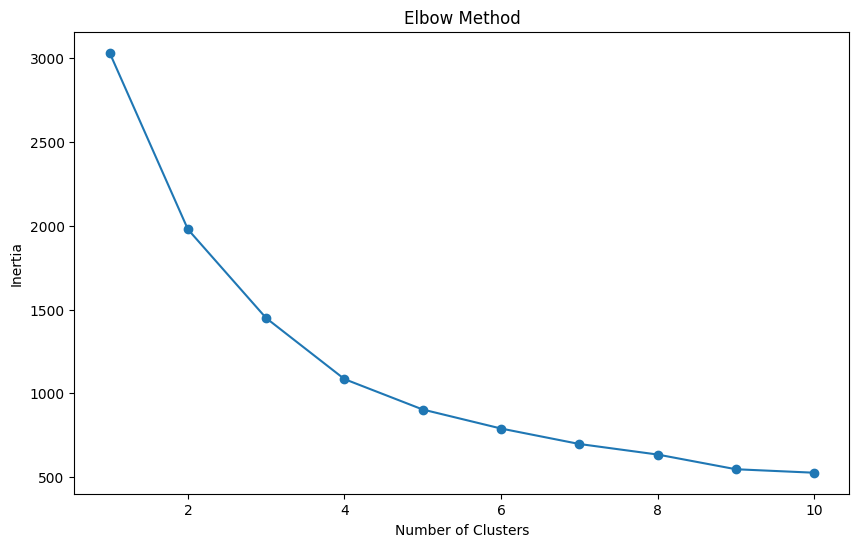

In [ ]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Applying K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(education_data_transposed)
labels = kmeans.labels_

# Adding cluster labels to the original data
education_data_transposed['Cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


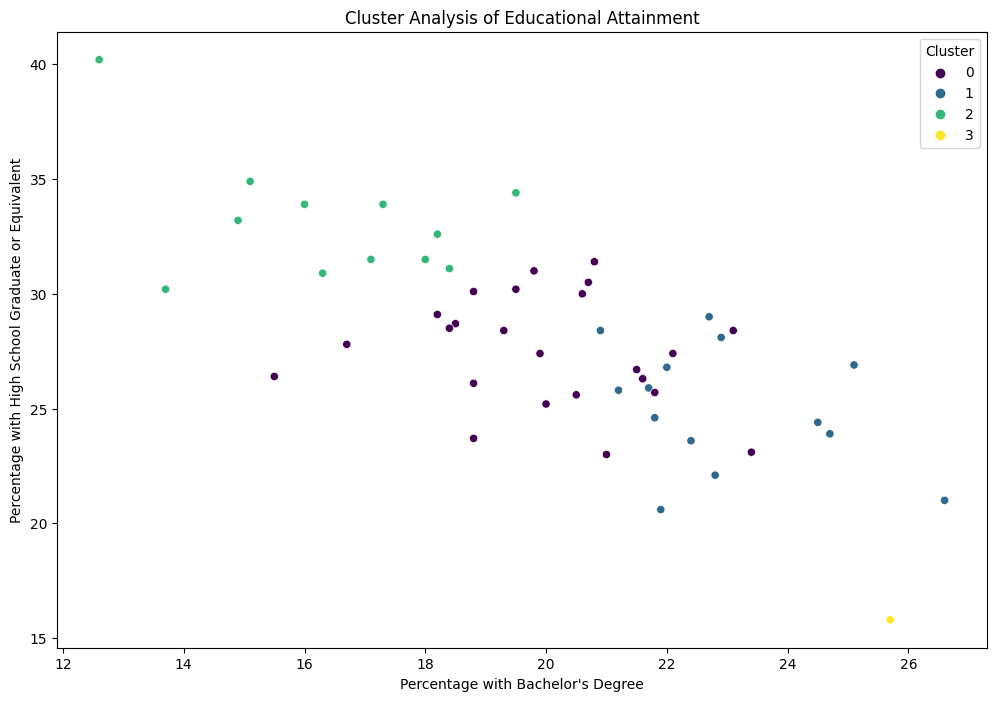

In [ ]:
# Visualizing the clusters using indices for columns
plt.figure(figsize=(12, 8))
sns.scatterplot(x=education_data_transposed.iloc[:, 5], y=education_data_transposed.iloc[:, 2], hue=education_data_transposed['Cluster'], palette='viridis')
plt.title('Cluster Analysis of Educational Attainment')
plt.xlabel('Percentage with Bachelor\'s Degree')
plt.ylabel('Percentage with High School Graduate or Equivalent')
plt.show()

# Analysis of Crime Data

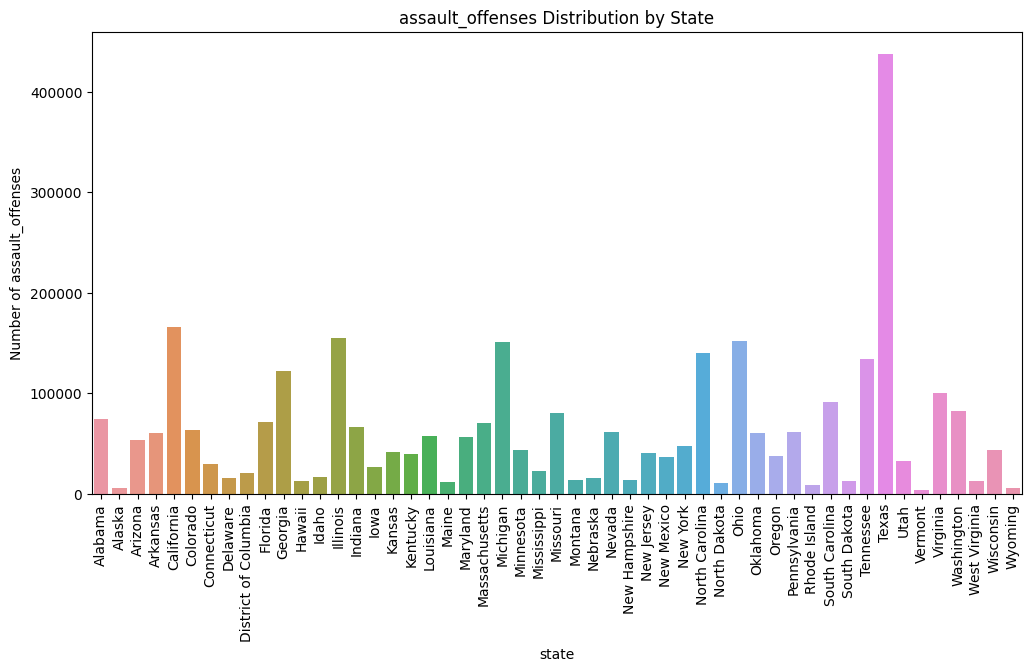

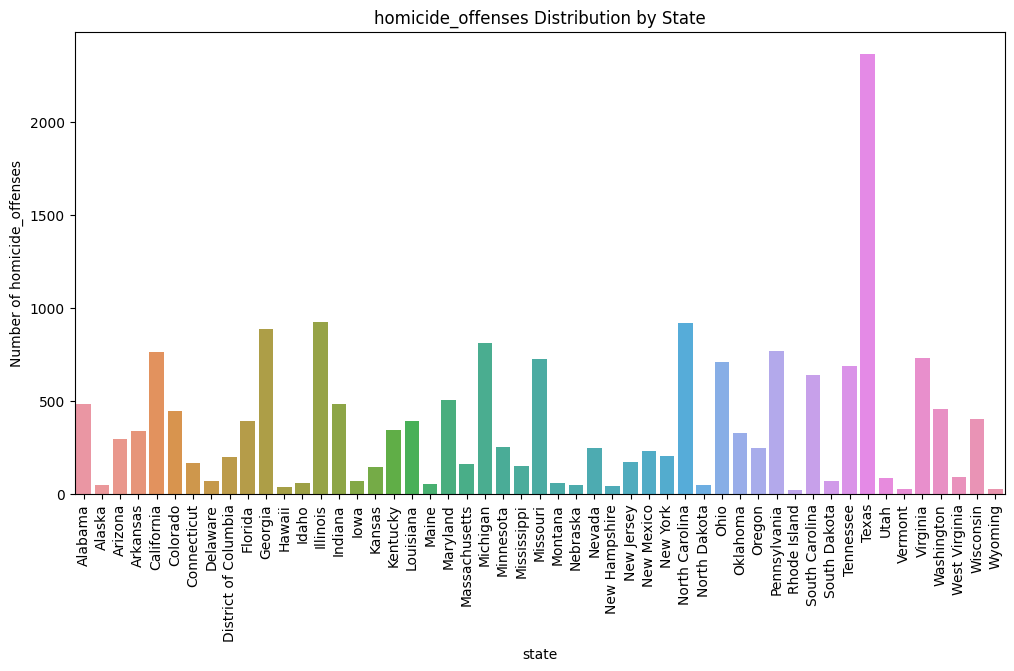

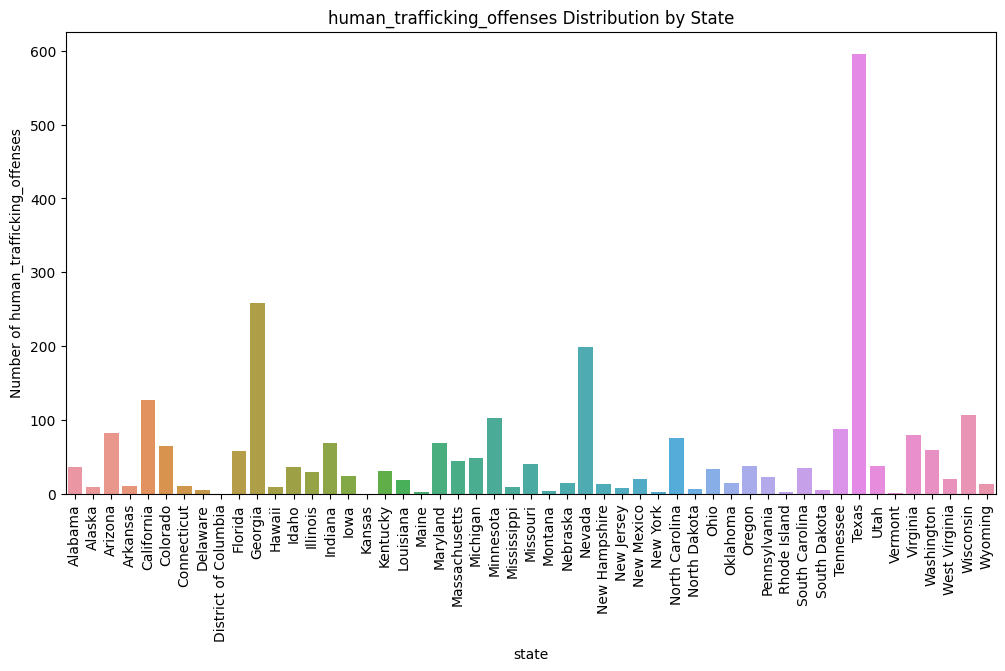

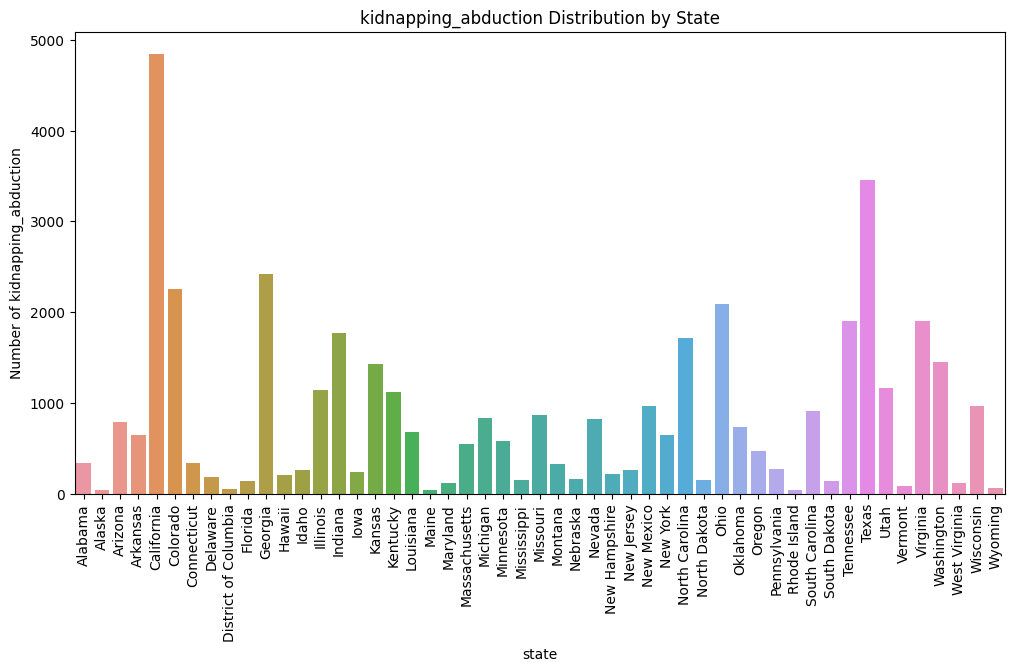

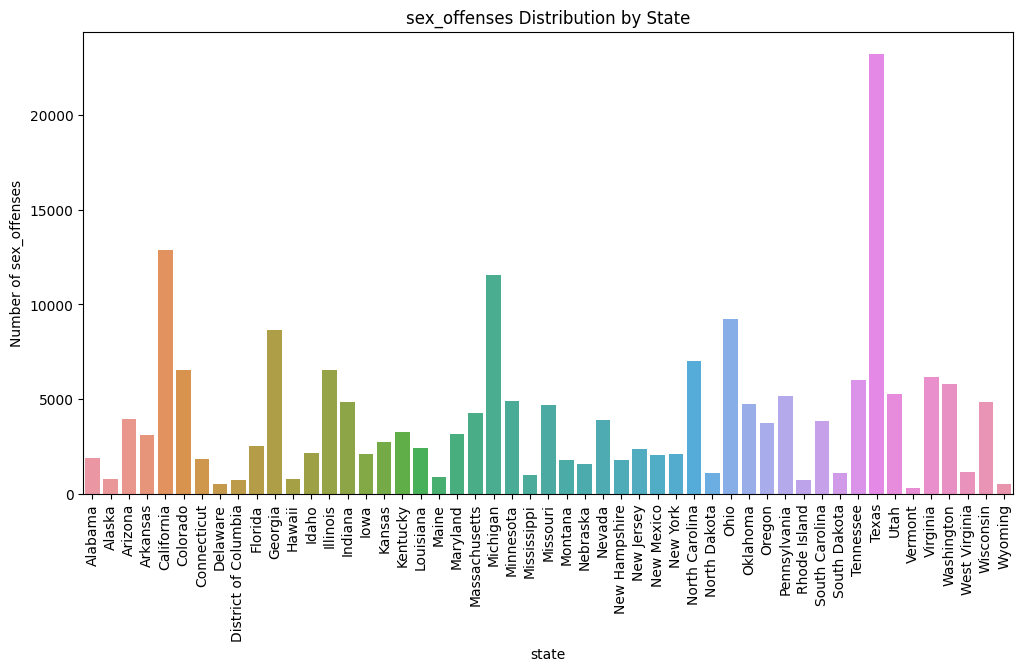

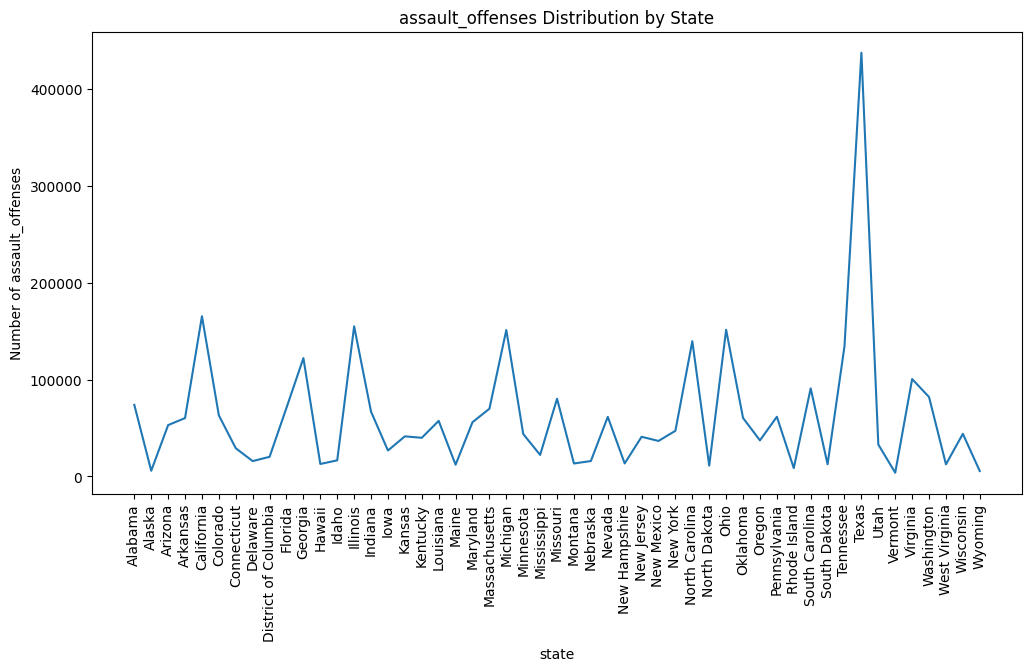

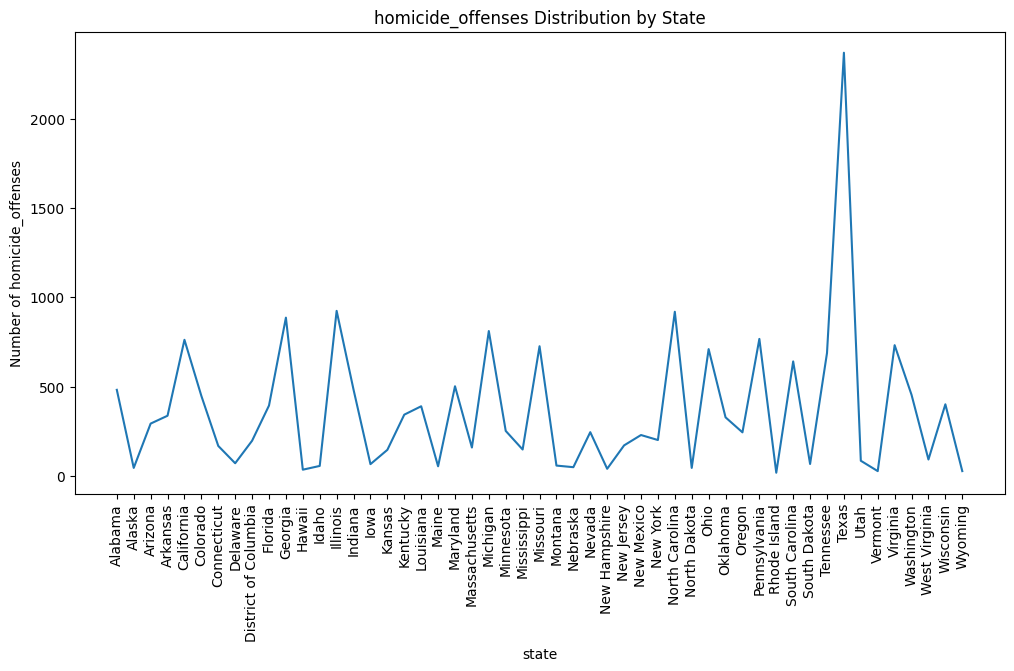

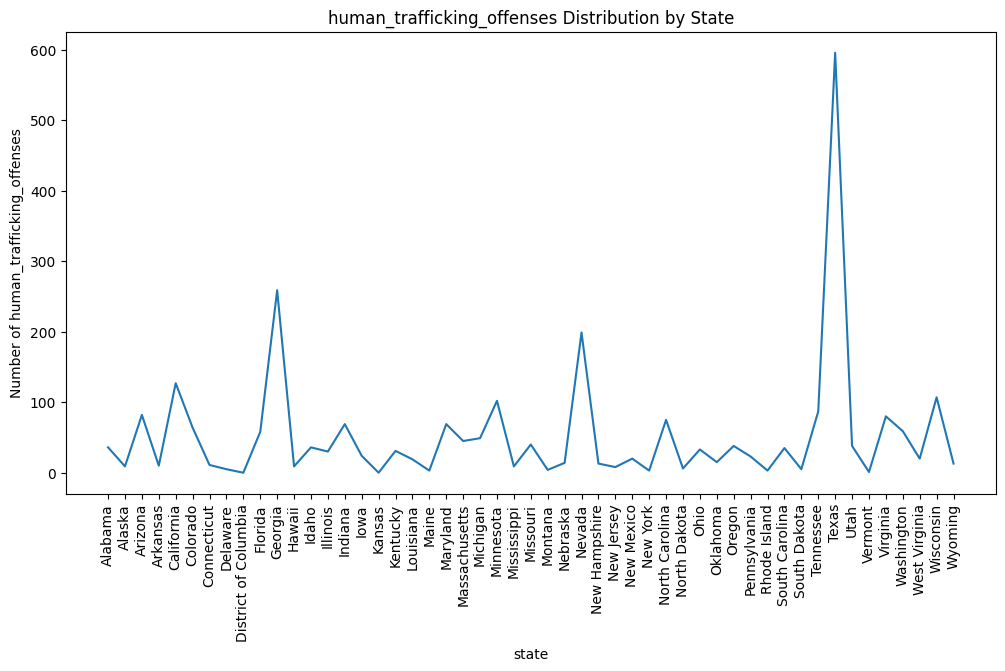

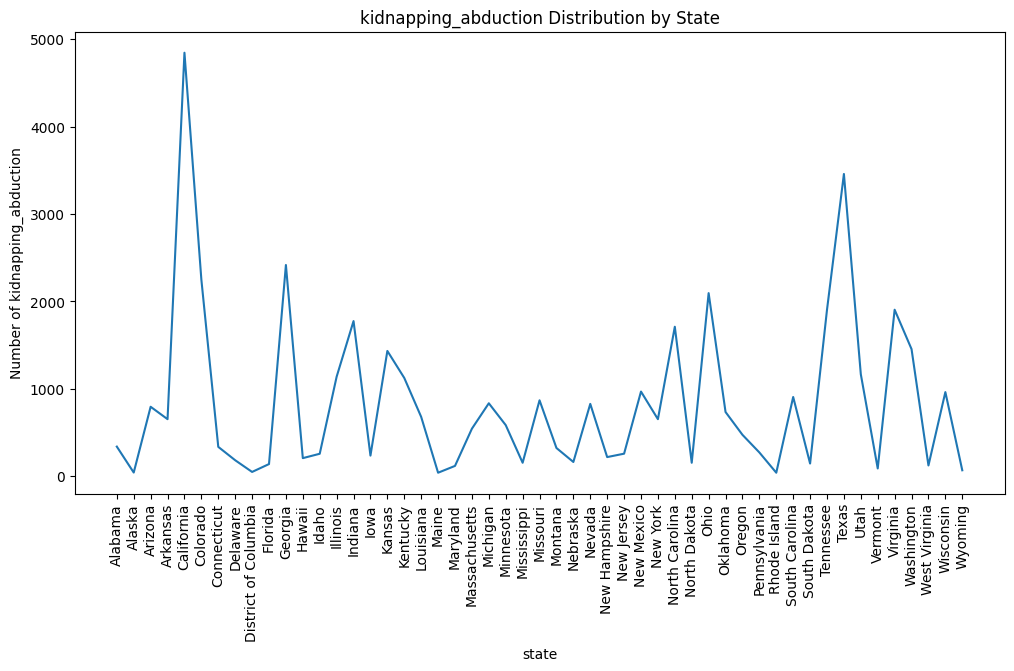

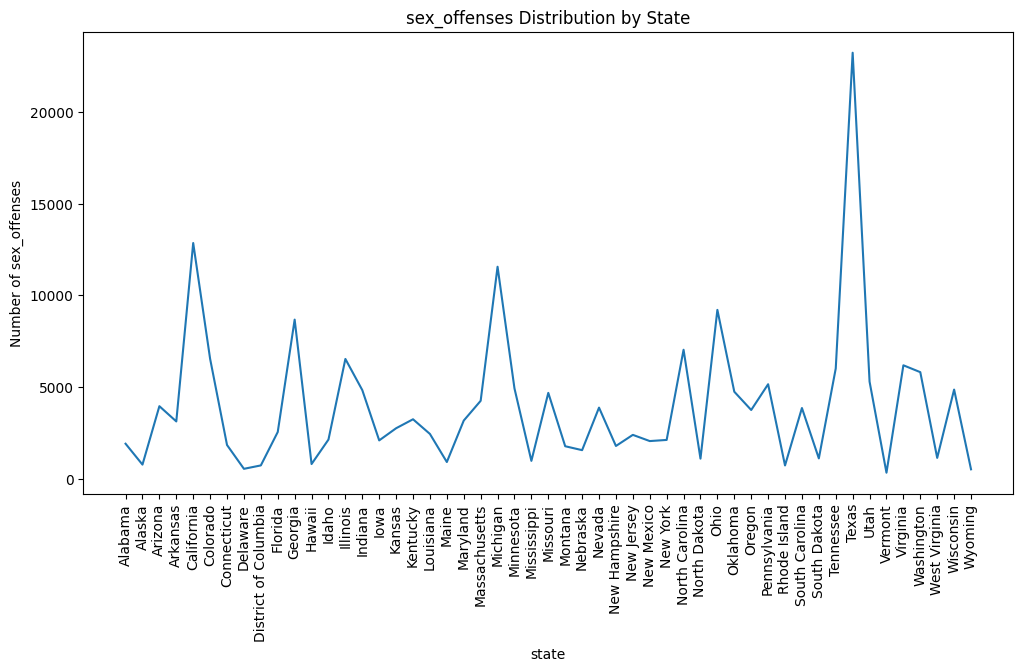

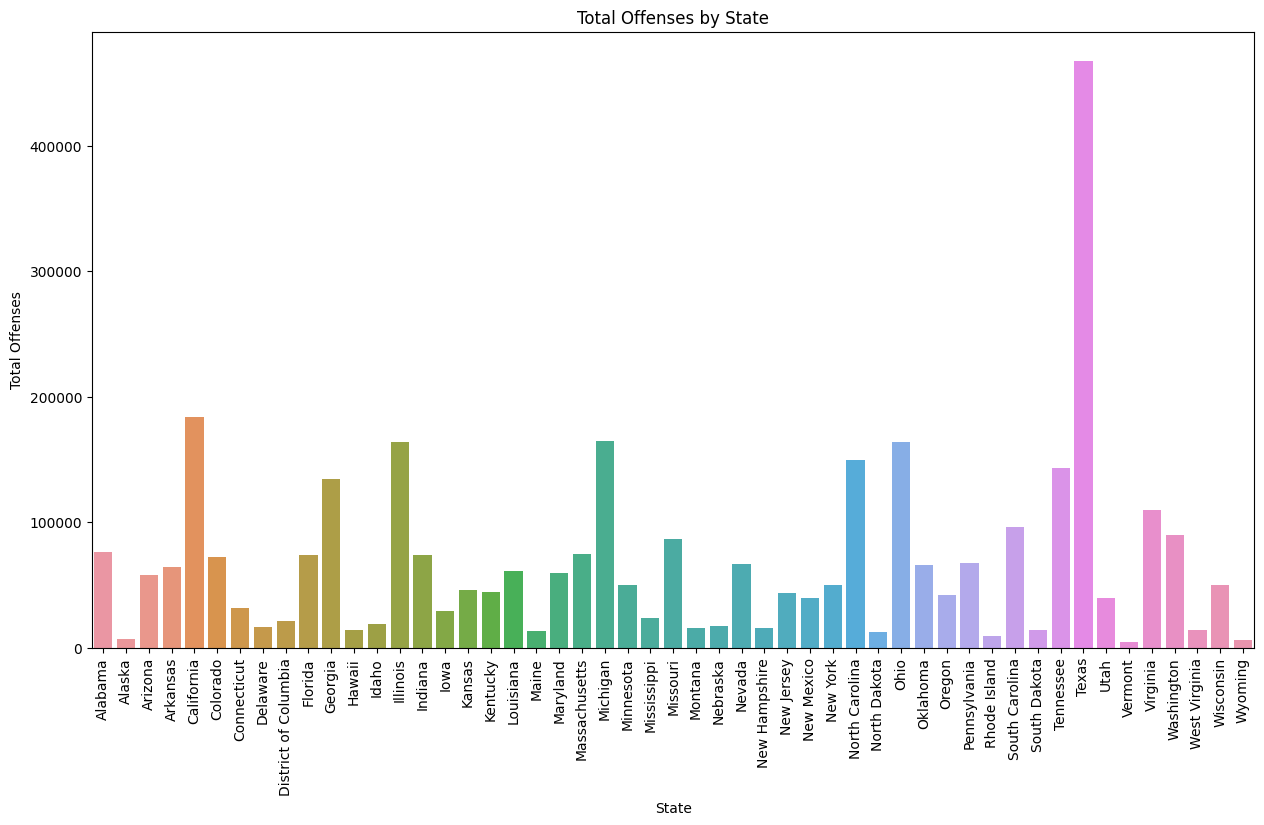

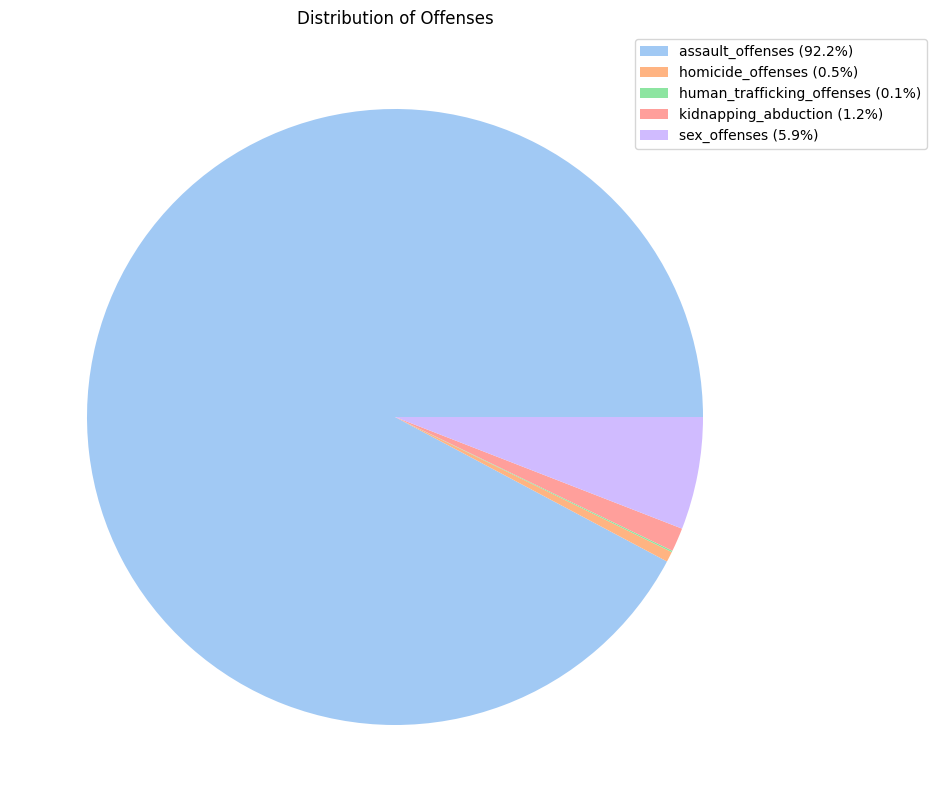

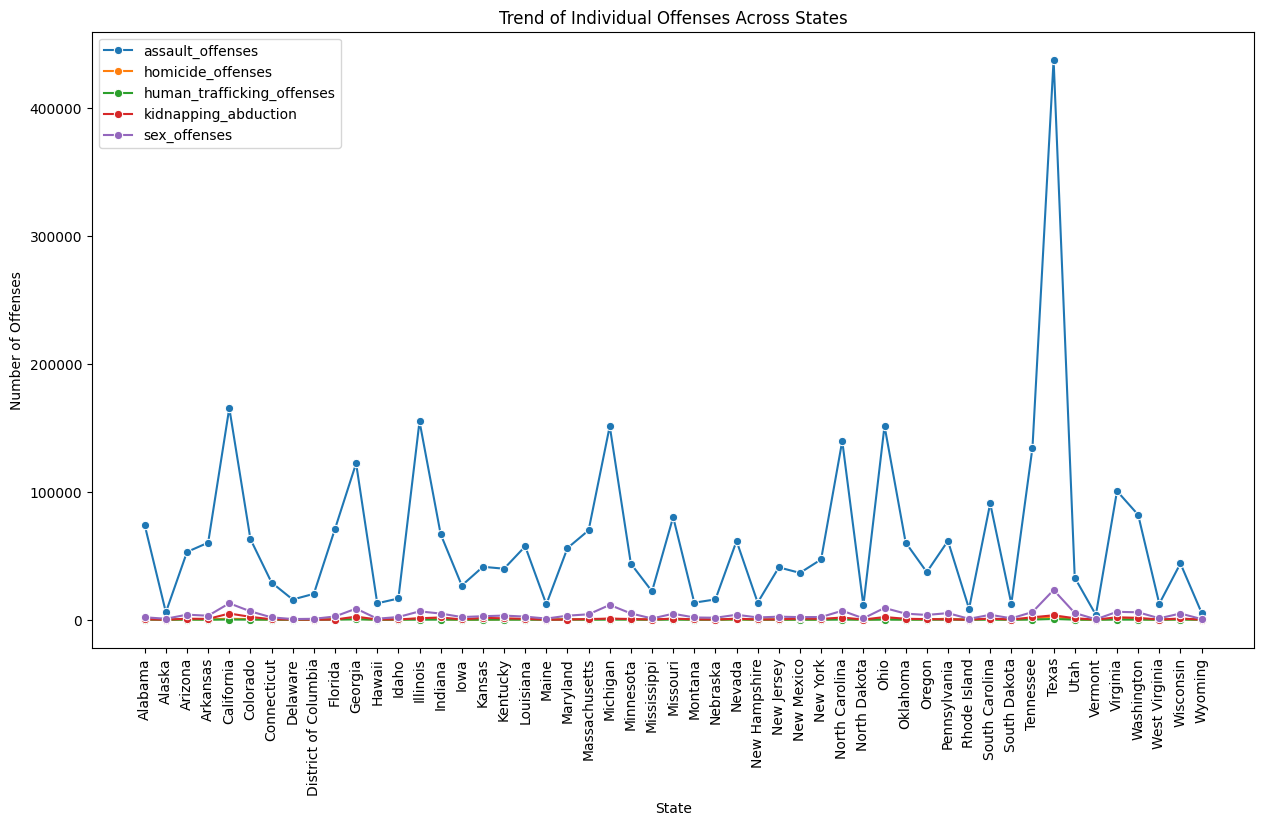

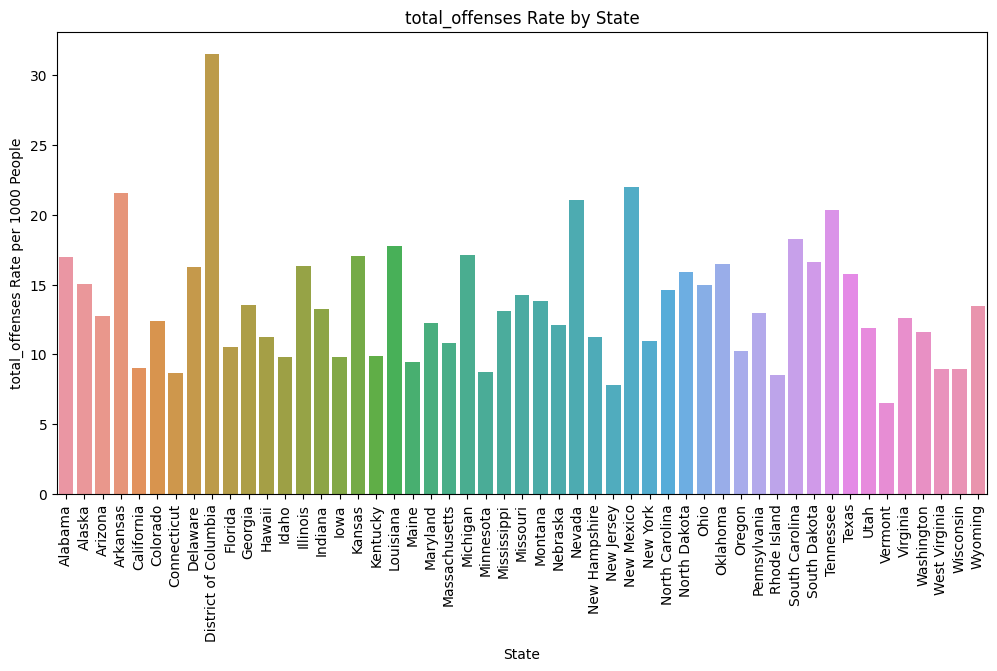

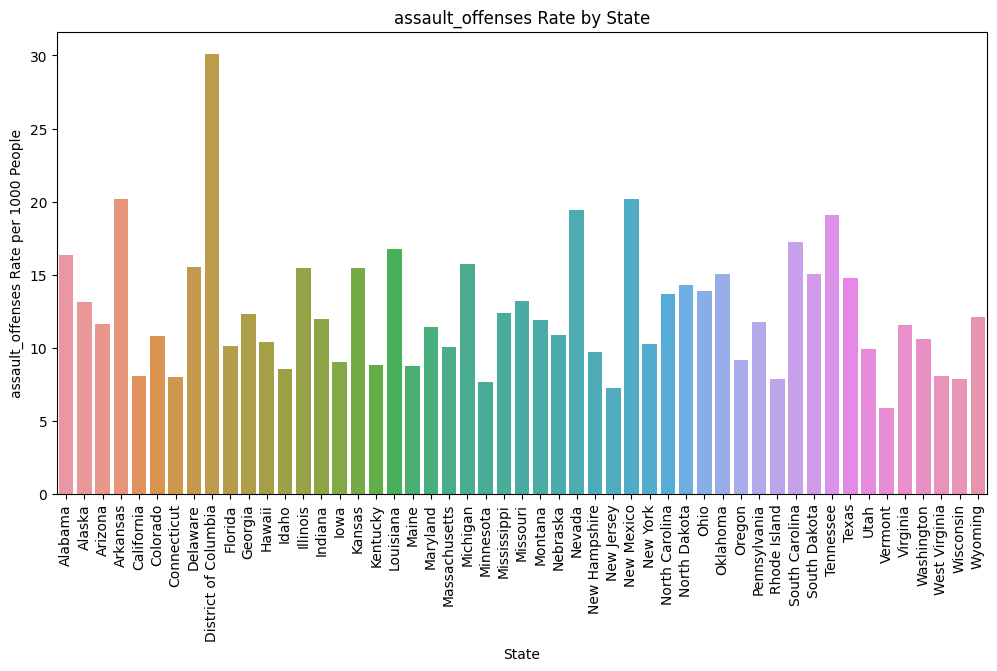

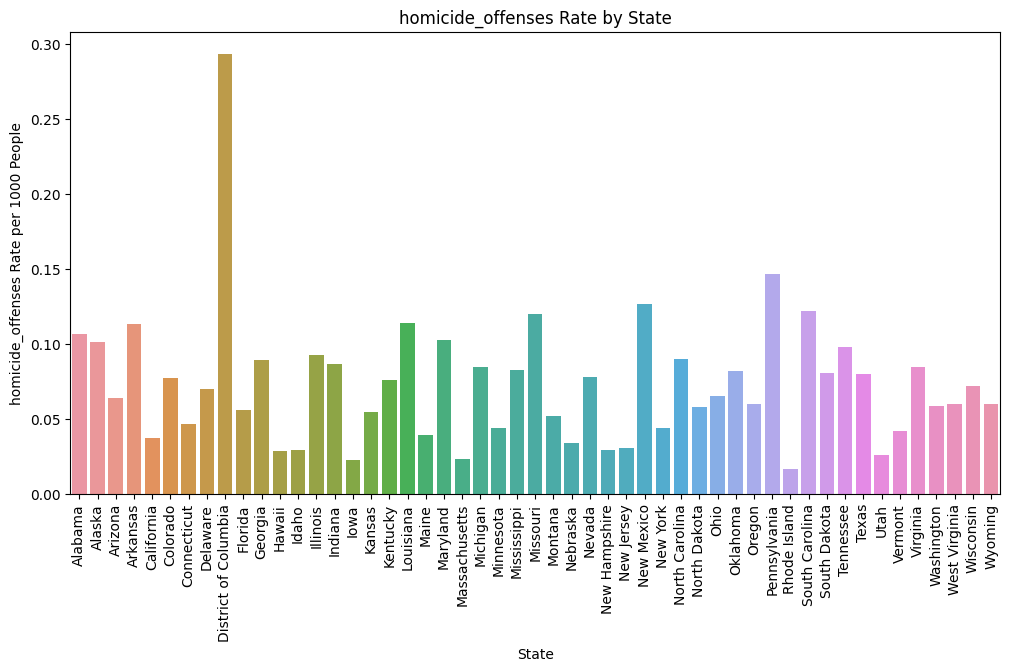

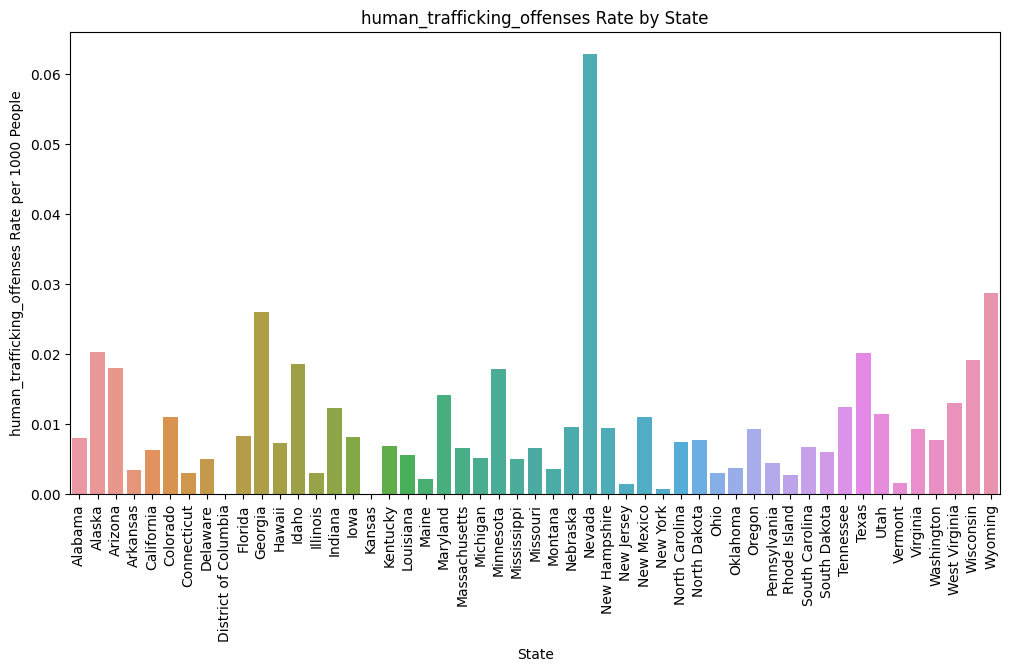

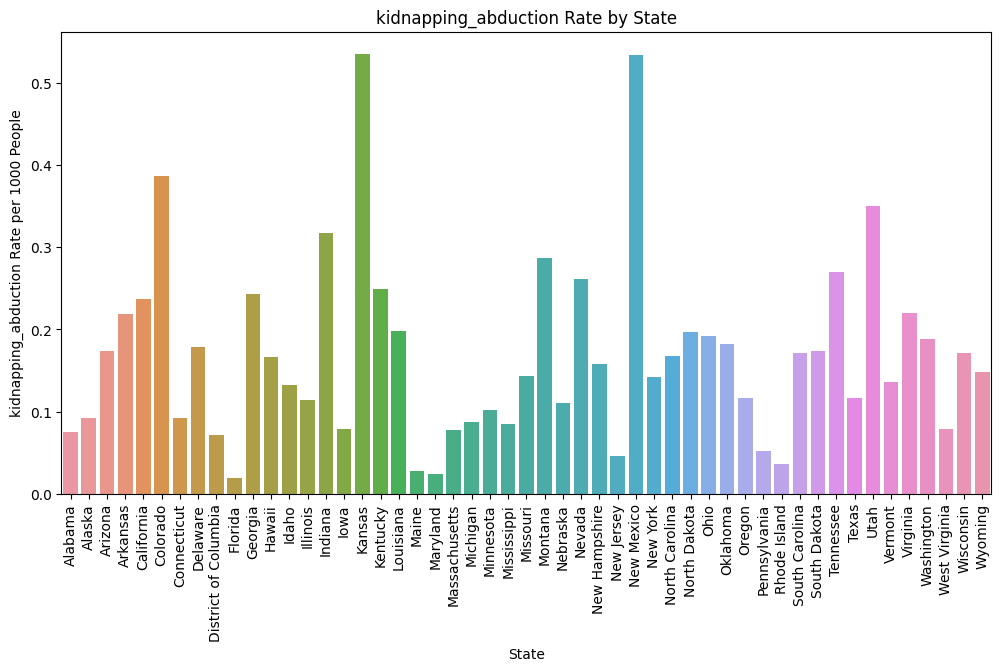

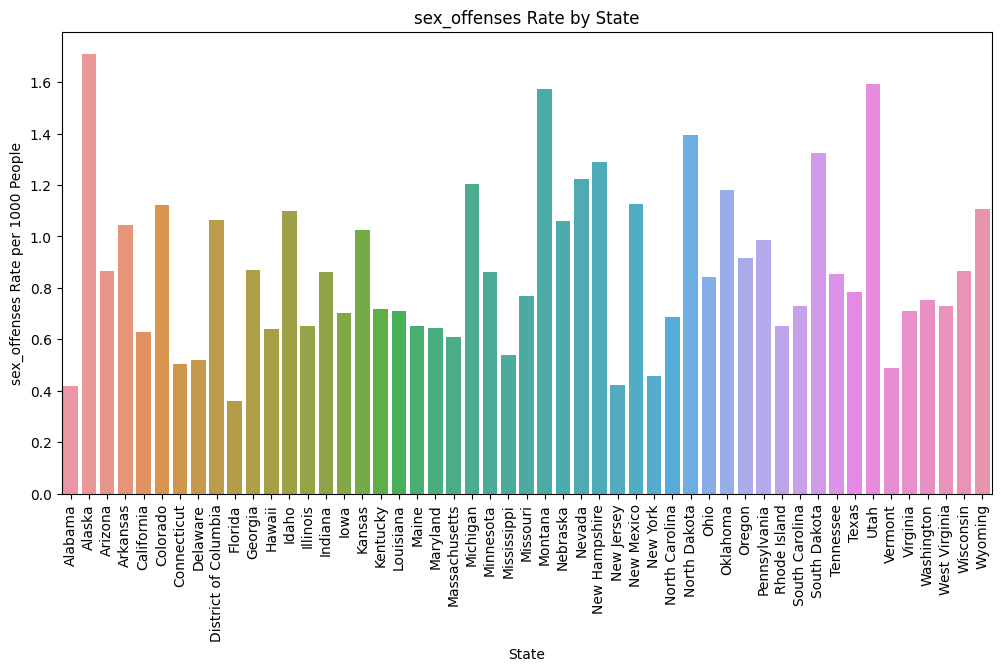

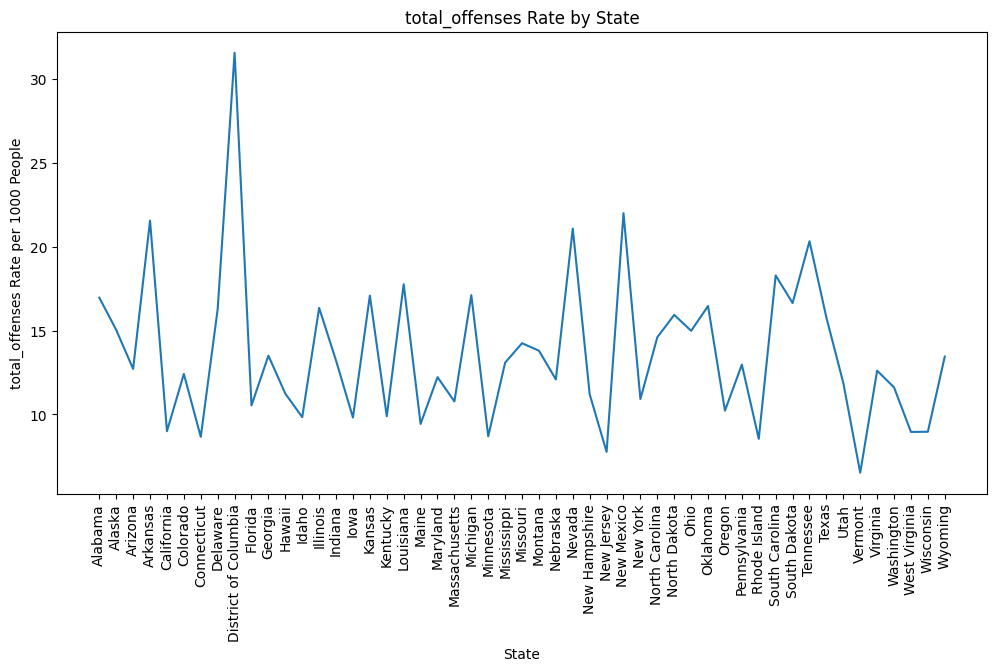

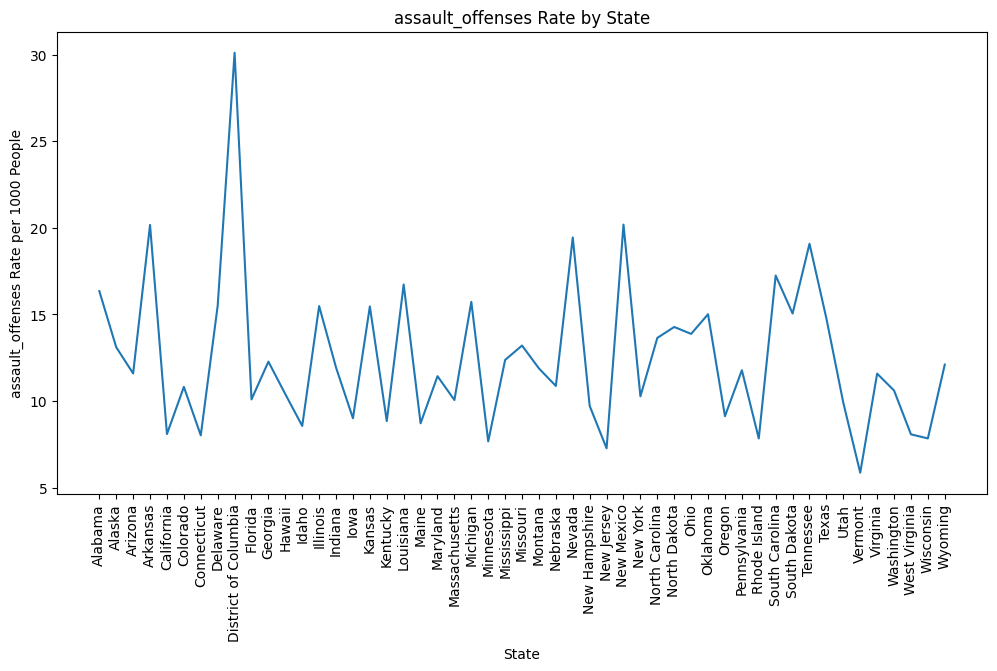

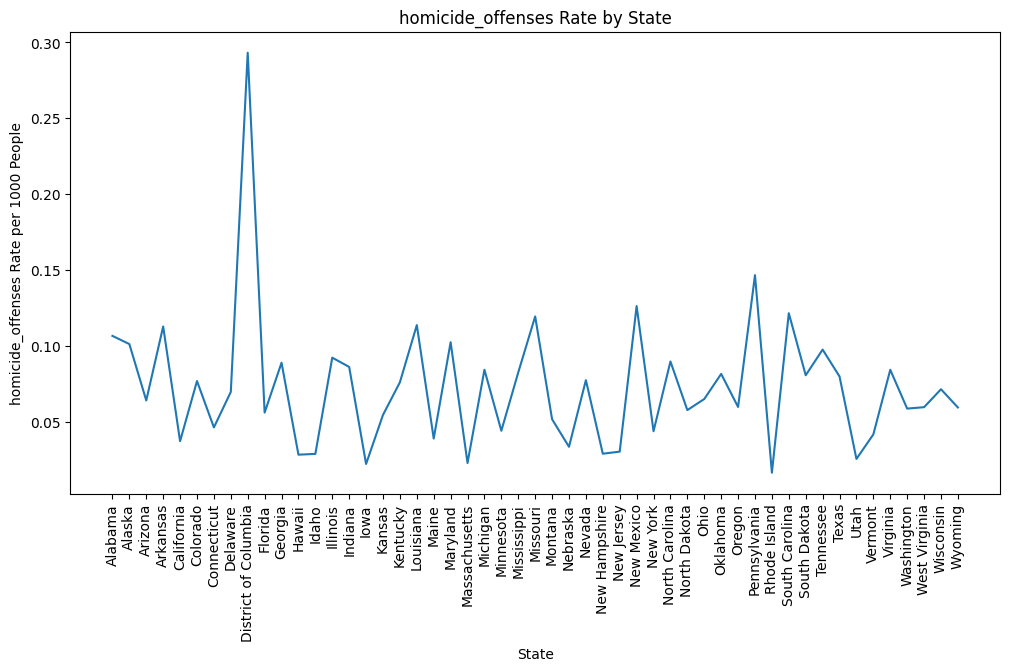

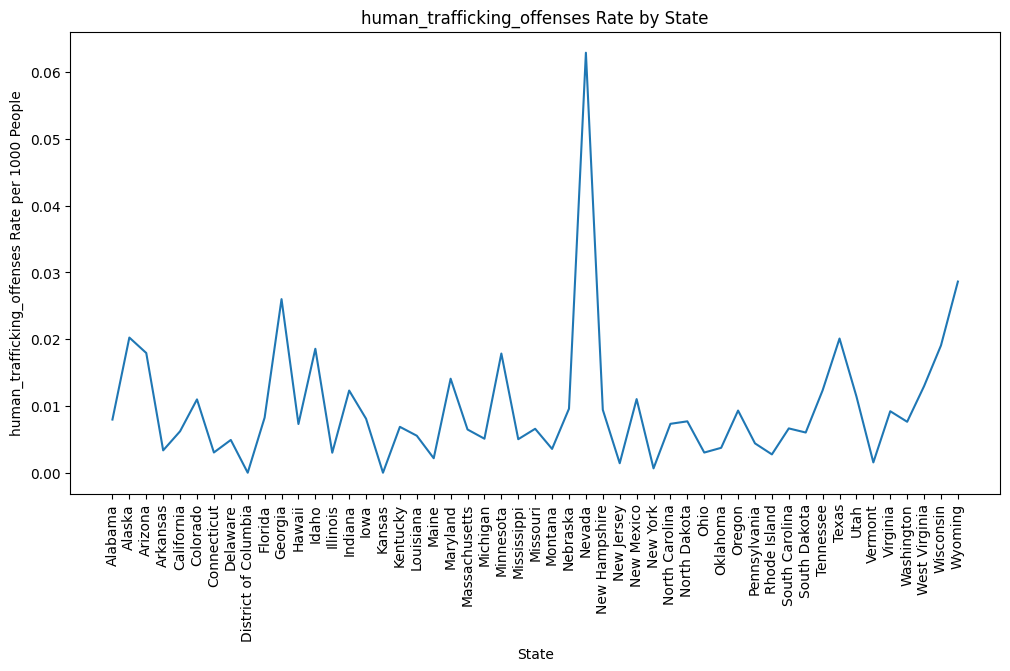

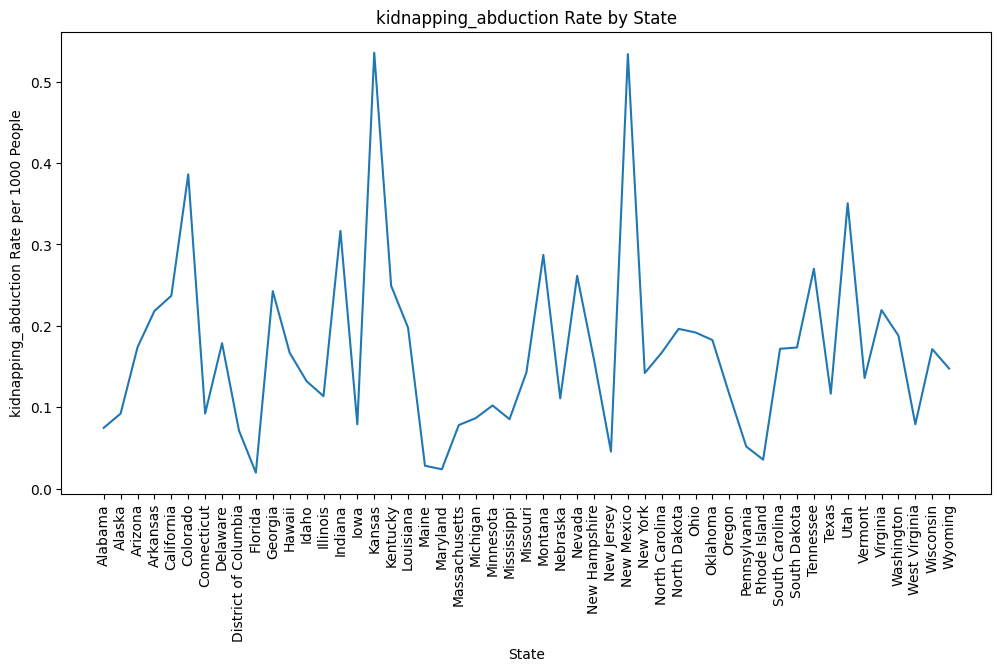

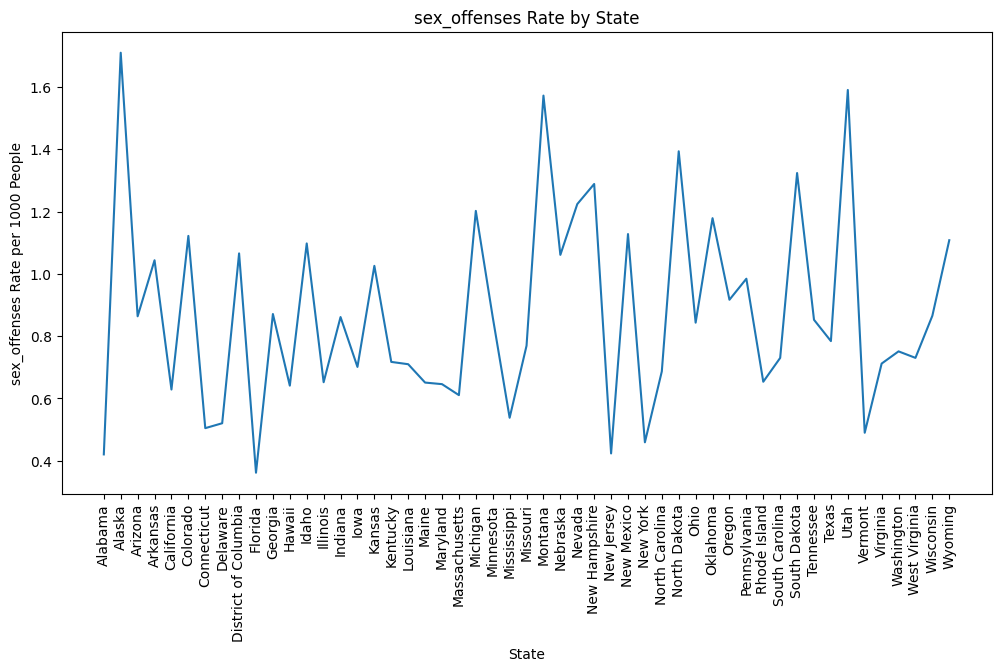

In [ ]:
offense_columns = ['assault_offenses', 'homicide_offenses', 'human_trafficking_offenses', 'kidnapping_abduction', 'sex_offenses']

# Bar Plot of the total of each type of crime by state
for crime_columns in offense_columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='state', y=crime_columns, data=crime_data)
    plt.title(f'{crime_columns} Distribution by State')
    plt.xlabel('state')
    plt.ylabel(f'Number of {crime_columns}')
    plt.xticks(rotation=90)
    plt.show()

# Line Plot of the total of each type of crime by state
for crime_column in offense_columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='state', y=crime_column, data=crime_data)
    plt.title(f'{crime_column} Distribution by State')
    plt.xlabel('state')
    plt.ylabel(f'Number of {crime_column}')
    plt.xticks(rotation=90)
    plt.show()

# bar plot to see total offenses in each state
plt.figure(figsize=(15, 8))
sns.barplot(x='state', y='total_offenses', data=crime_data)
plt.title('Total Offenses by State')
plt.xlabel('State')
plt.ylabel('Total Offenses')
plt.xticks(rotation=90)
plt.show()

#pie chart of distribution of offenses
plt.figure(figsize=(10, 10))
crime_data[offense_columns].sum().plot(kind='pie', labels=None, colors=sns.color_palette('pastel'))
legend_labels = [f'{col} ({round(crime_data[col].sum()/crime_data[offense_columns].sum().sum()*100, 1)}%)' for col in crime_data[offense_columns].columns]
plt.legend(legend_labels, loc="upper right", bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Offenses')
plt.ylabel('')
plt.show()

# line chart for individual offenses over states
plt.figure(figsize=(15, 8))
for crime_column in offense_columns:
    sns.lineplot(x='state', y=crime_column, data=crime_data, label=crime_column, marker='o')
plt.title('Trend of Individual Offenses Across States')
plt.xlabel('State')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Calculate crime rates per capita
per_capita_columns = ['total_offenses', 'assault_offenses', 'homicide_offenses', 'human_trafficking_offenses', 'kidnapping_abduction', 'sex_offenses']
for col in per_capita_columns:
    crime_data[f'{col} Rate'] = crime_data[col] / crime_data['population_covered'] * 1000  # per 1000 people

# bar plot of crime rates per capita
for col in per_capita_columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='state', y=f'{col} Rate', data=crime_data)
    plt.title(f'{col} Rate by State')
    plt.xlabel('State')
    plt.ylabel(f'{col} Rate per 1000 People')
    plt.xticks(rotation=90)
    plt.show()

# line chart of crime rates per capita
for col in per_capita_columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='state', y=f'{col} Rate', data=crime_data)
    plt.title(f'{col} Rate by State')
    plt.xlabel('State')
    plt.ylabel(f'{col} Rate per 1000 People')
    plt.xticks(rotation=90)
    plt.show()




## Correlation Between Crime Types and Education Level




In [ ]:
crime_columns = ['total_offenses', 'assault_offenses', 'homicide_offenses',
                 'human_trafficking_offenses', 'kidnapping_abduction', 'sex_offenses']
for col in crime_columns:
    if crime_education_data[col].dtype == 'object':
        crime_education_data[col] = crime_education_data[col].str.replace(',', '').astype(float)


education_columns = crime_education_data.columns[10:]
for col in education_columns:
    if crime_education_data[col].dtype == 'object':
        # Convert percentages to floats
        crime_education_data[col] = crime_education_data[col].str.rstrip('%').astype('float') / 100

# Calculate the correlation matrix
correlation_matrix = crime_education_data[crime_columns + education_columns.tolist()].corr()


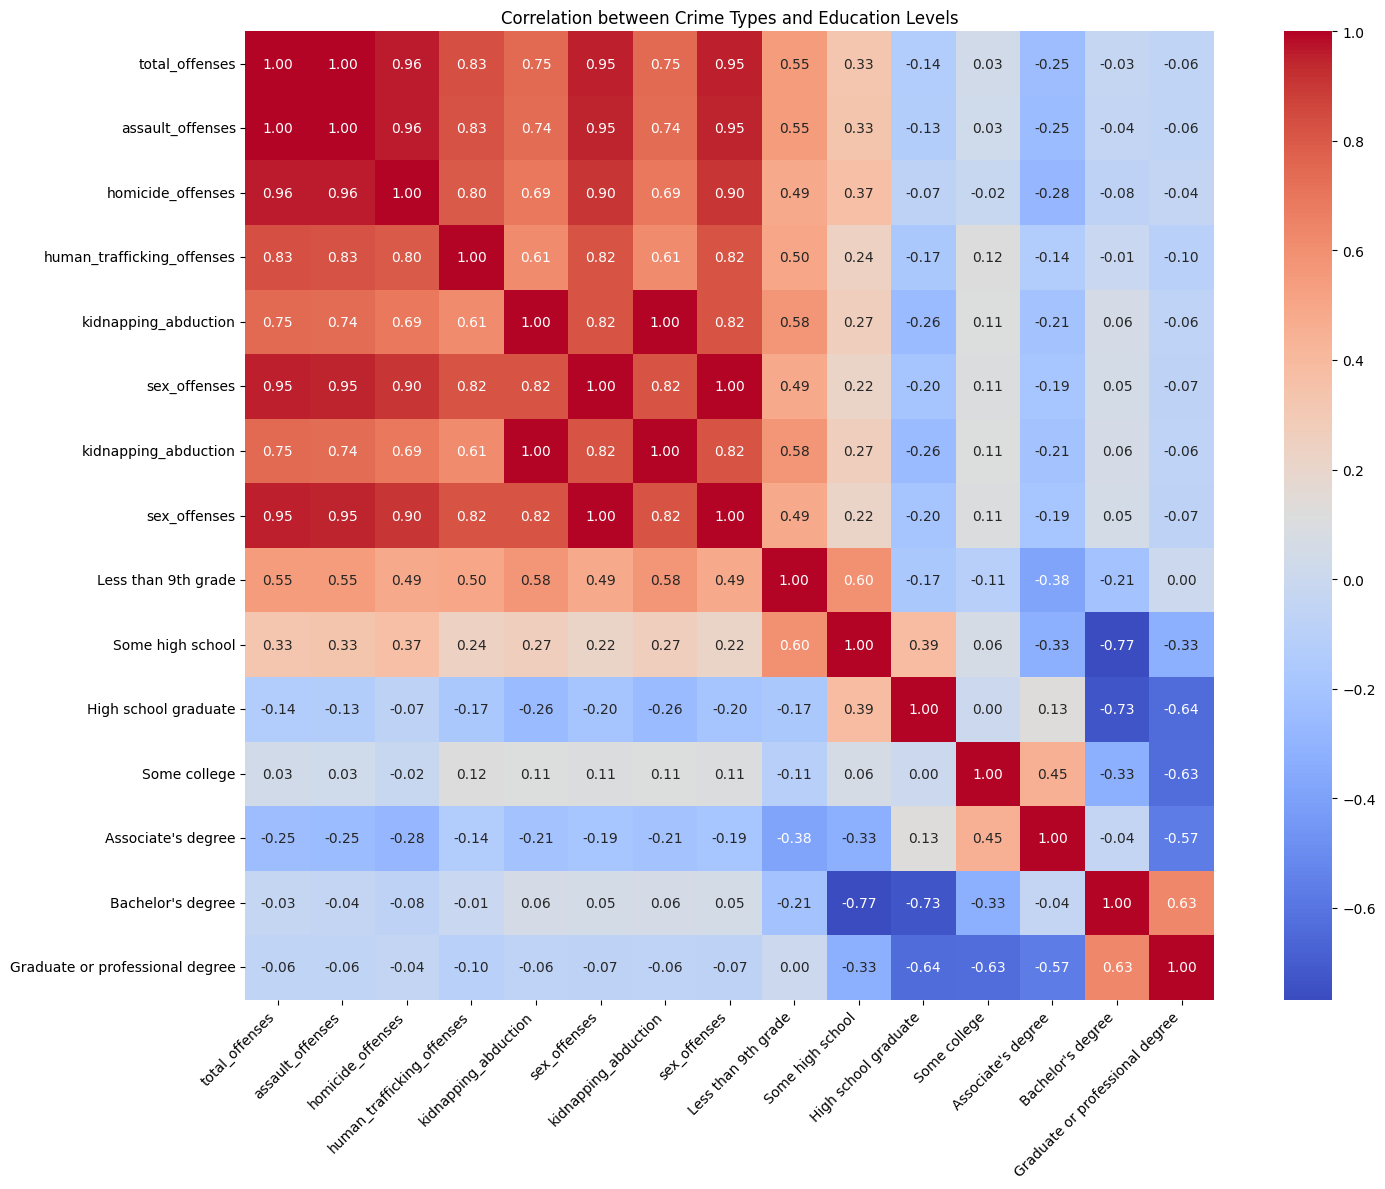

In [ ]:
# do the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Adjust the plot
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation between Crime Types and Education Levels')
plt.tight_layout()
plt.show()

Education vs Crime

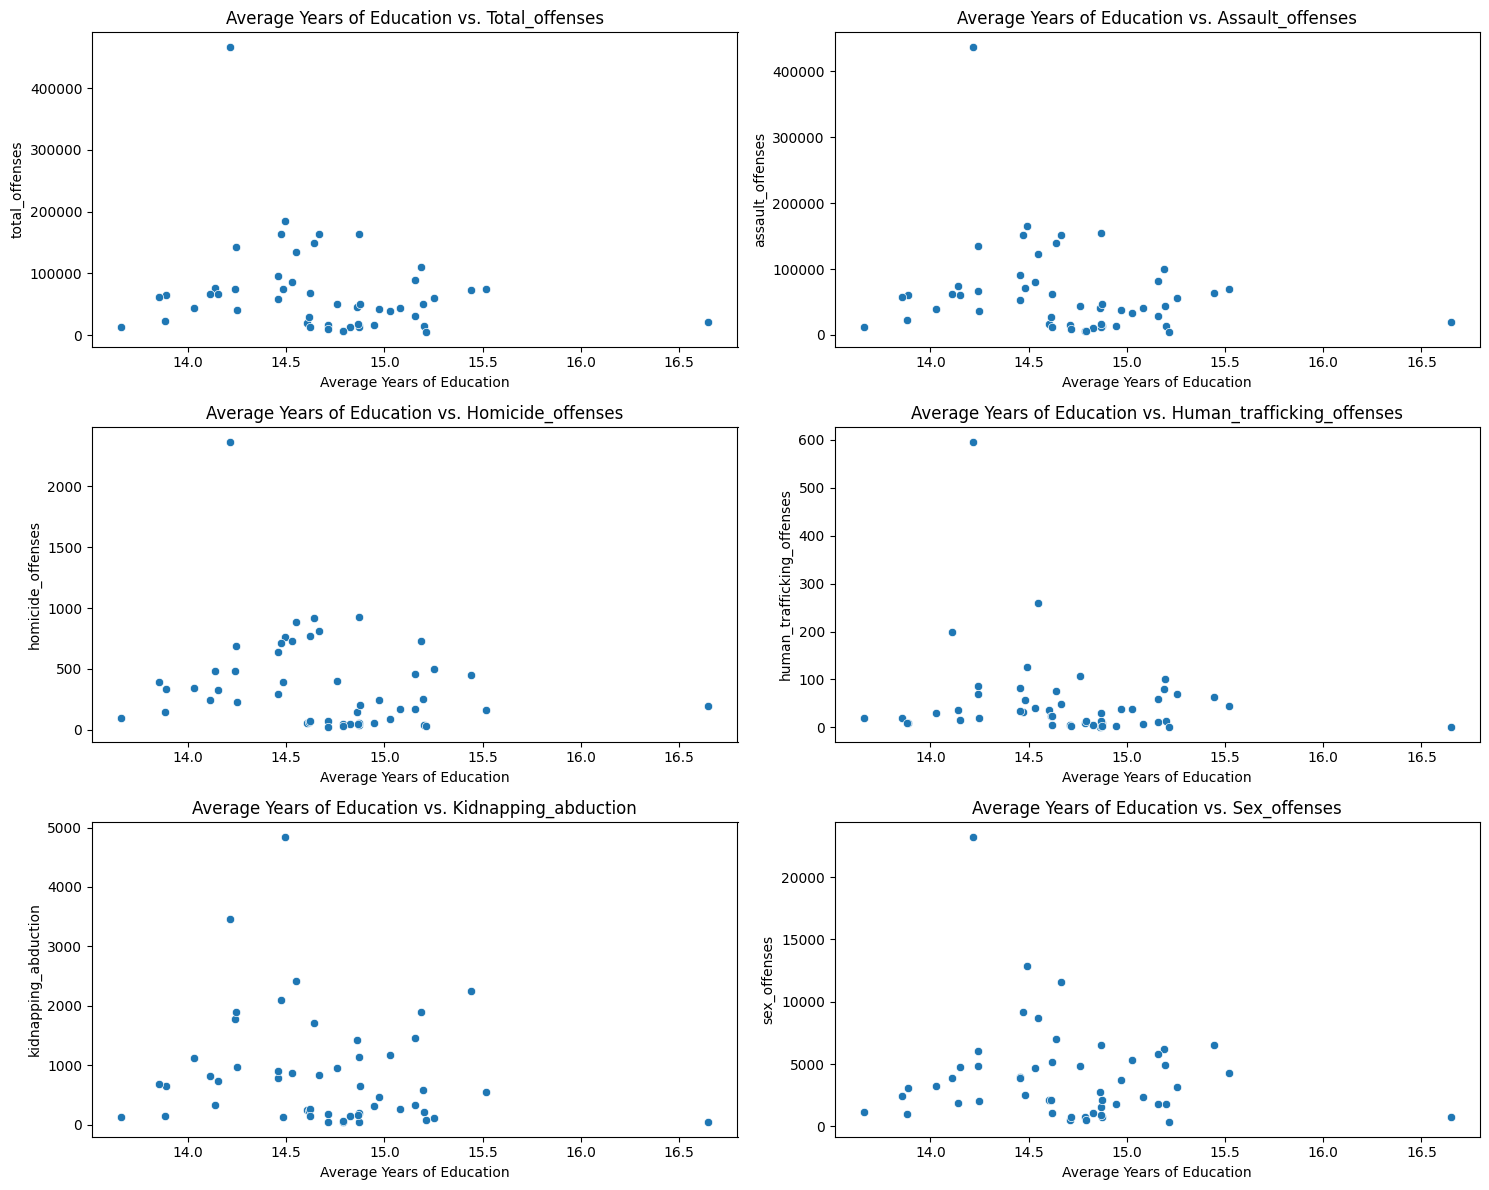

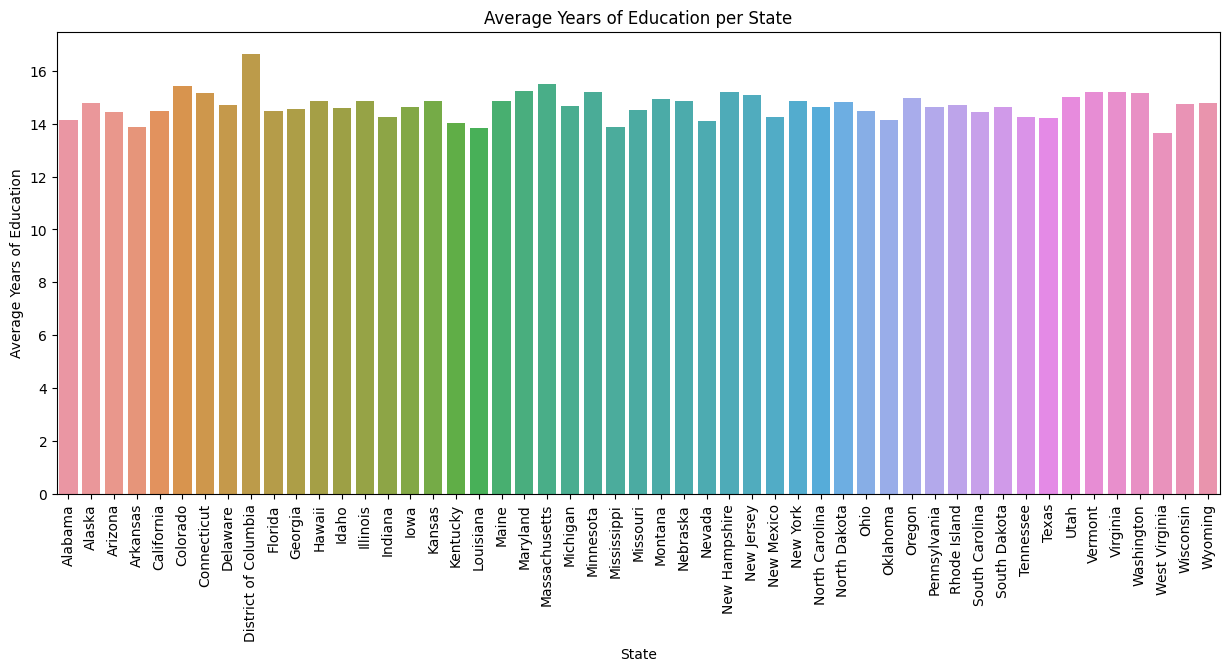

In [ ]:
#education levels to corresponding years of education
education_years = {
    "Less than 9th grade": 6,
    "Some high school": 9,
    "High school graduate": 12,
    "Some college": 14,
    'Associate\'s degree': 16,
    'Bachelor\'s degree': 18,
    "Graduate or professional degree": 21,
}

#calculate the weighted sum of educaiton years
def calculate_weighted_sum(row):

  #Parameters: - row (pd.series)
  # returns: float - the average yaers of eucation calculted from the weighted sum
  #Does: calculate the weighted sum of education years for each row based on the education levels, calculate the weighted sum
  # returns the average years of education

    weighted_sums = row * pd.Series(education_years)
    total_weighted_sum = weighted_sums.sum()
    return total_weighted_sum /100

#apply the calculate_weighted_sum function to each row
crime_education_data['Average Years of Education'] = crime_education_data.apply(calculate_weighted_sum, axis=1)

crime_types = ['total_offenses', 'assault_offenses', 'homicide_offenses',
               'human_trafficking_offenses', 'kidnapping_abduction', 'sex_offenses']

# scatterplot to compare years of education to number of crimes
plt.figure(figsize=(15, 12))
for crime_type in crime_types:
    plt.subplot(3, 2, crime_types.index(crime_type) + 1)
    sns.scatterplot(x='Average Years of Education', y=crime_type, data=crime_education_data)
    plt.title(f'Average Years of Education vs. {crime_type.capitalize()}')
plt.tight_layout()
plt.show()

# plot to see average years of education in each state
plt.figure(figsize=(15, 6))
sns.barplot(x='state', y='Average Years of Education', data=crime_education_data)
plt.xticks(rotation=90)
plt.title('Average Years of Education per State')
plt.xlabel('State')
plt.ylabel('Average Years of Education')
plt.show()





